# Lead Scoring Case study
A logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. 

## Data analysis

### We will import the necessary libraries and data, and then analyze it to gain an overview of the dataset.

In [4]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("Leads.csv")
data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [7]:
data.shape

(9240, 37)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### As there are a lot of null values, we will take the percentage of null values and see how can we proceed

In [9]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### There are certain columns which are having more than 40% null values
- Lead Quality
- Asymmetrique Activity Index
- Asymmetrique Profile Index
- Asymmetrique Activity Score
- Asymmetrique Profile Score

We will analyze the unique values in these columns and then figure out whether we can replace the null values or remove the columns itself.

In [10]:
data['Lead Quality'].value_counts()

Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

#### We can replace the null values with 'Unknown' as it seems to be an important column. The other option is to drop this column also. We will replace this column for now.

In [11]:
data['Lead Quality'].fillna('Unknown', inplace=True)

In [12]:
data['Lead Quality'].value_counts()

Lead Quality
Unknown              4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

We will check the remaining columns from the above list

In [13]:
data['Asymmetrique Activity Index'].value_counts()

Asymmetrique Activity Index
02.Medium    3839
01.High       821
03.Low        362
Name: count, dtype: int64

In [14]:
data['Asymmetrique Profile Index'].value_counts()

Asymmetrique Profile Index
02.Medium    2788
01.High      2203
03.Low         31
Name: count, dtype: int64

In [15]:
data['Asymmetrique Activity Score'].value_counts()

Asymmetrique Activity Score
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: count, dtype: int64

In [16]:
data['Asymmetrique Profile Score'].value_counts()

Asymmetrique Profile Score
15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: count, dtype: int64

#### As it is difficult to assume the values of theses columns we can drop it.

In [17]:
data.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis = 1, inplace = True)

### We will check the Tags columns
Tags - 36.29% null values

In [18]:
data['Tags'].value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

##### As it is difficult to assume the values of theses columns we can drop it.

In [19]:
data.drop('Tags', inplace=True, axis=1)

#### We will check the country column
Country - 26.63% null values

In [20]:
data.Country.value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Nigeria                    4
Germany                    4
Canada                     4
Sweden                     3
Italy                      2
Belgium                    2
Ghana                      2
Philippines                2
Netherlands                2
China                      2
Asia/Pacific Region        2
Bangladesh                 2
Uganda                     2
Russia                     1
Sri Lanka                  1
Tanzania                   1
Kenya                      1
Malaysia                   1
Liberia                    1
Denmar

#### As it is difficult to assume the values of theses columns we can drop it.

In [21]:
data.drop('Country', axis=1, inplace=True)

### We will check the Lead Profile Column
Lead Profile - 29.32% null values

In [22]:
data['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

We can drop the column

#### We have a lot of select values which is similar to null which increases the null value percentage. It is better to drop the column.

In [23]:
data.drop('Lead Profile', axis=1, inplace=True)

### We will check the 'What matters most to you in choosing a course' column
29.32% Null values

In [24]:
data['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

#### We can assume students with null values will choose the course for better career prospects as 99% of the not null values chose the same. We will replace it with the mode here.

In [25]:
x = data['What matters most to you in choosing a course'].mode()[0]
data['What matters most to you in choosing a course'].fillna(x, inplace=True)

### We will check the 'What is your current occupation' column
29.11% null values

In [26]:
data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

#### As it is difficult to assume the occupation, we can drop the column

In [27]:
data.drop('What is your current occupation', axis=1, inplace=True)

### We will check the 'How did you hear about X Education' column
23.89% null values

In [28]:
data['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

#### We have a lot of select values which is similar to null which increases the null value percentage. It is better to drop the column.

In [29]:
data.drop('How did you hear about X Education', axis=1, inplace=True)

### We will check the 'Specialization' column
15.56% null values

In [30]:
data['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

#### We have a lot of select values which is similar to null which increases the null value percentage. It is better to drop the column.

In [31]:
data.drop('Specialization', axis=1, inplace=True)

### We will check the 'City' column
15.37% null values

In [32]:
data['City'].value_counts()

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

#### We can drop the column as we have a lot of 'Select' values 

In [33]:
data.drop('City', axis=1, inplace=True)

In [34]:
data.isnull().sum()

Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                          0
Digital Advertisement                              0
Through Recommendations                       

In [35]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

### We will check 'Last Activity' column
1.11% null values

In [36]:
data['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: count, dtype: int64

#### We can remove the rows with empty values as it is a small set of data

In [37]:
data = data[~pd.isna(data['Last Activity'])]

### We will check 'Page Views Per Visit'
1.48 % null values

In [38]:
data['Page Views Per Visit'].value_counts()

Page Views Per Visit
0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
         ... 
3.80        1
3.82        1
1.93        1
11.50       1
2.08        1
Name: count, Length: 114, dtype: int64

#### We can drop the records like before or replace it with the median

In [39]:
data['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [40]:
x = data['Page Views Per Visit'].median()
data['Page Views Per Visit'].fillna(x, inplace=True)

### We will check 'TotalVisits' column
1.48% null values

In [41]:
data['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

#### We can replace with the median

In [42]:
x = data['TotalVisits'].median()
data['TotalVisits'].fillna(x, inplace=True)

### We will check 'Lead Source' column
0.39% null values

In [43]:
data['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             462
Welingak Website      129
Referral Sites        125
Facebook               39
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

#### We can replace with the mode value here

In [44]:
x = data['Lead Source'].mode()[0]
data['Lead Source'].fillna(x, inplace=True)

#### We will update 'google' to 'Google' as both are same.

In [45]:
data['Lead Source'] = data['Lead Source'].replace('google', 'Google')

### We will check for any 'Select' value in our dataset as it is equal to null.

In [46]:
# Check if 'Select' is in each element
select_in_columns = data.applymap(lambda x: str(x).lower() == 'select')

# Sum across rows to see if any 'Select' is in the column
select_in_columns.any().sum()

np.int64(0)

#### We don't have any value equal to 'Select'

### Checking the null values again to confirm

In [47]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

### Checking for Outliers

In [48]:
numerical = list(set(data.select_dtypes(include=['float64', 'int64']).columns))
numerical

['Total Time Spent on Website',
 'TotalVisits',
 'Page Views Per Visit',
 'Lead Number',
 'Converted']

In [49]:
data[numerical].describe(percentiles=[.25, .5, .75, .90, .95, .99])

Total Time Spent on Website  TotalVisits  Page Views Per Visit  \
count                  9137.000000  9137.000000           9137.000000   
mean                    482.491409     3.443581              2.361470   
std                     545.614027     4.845886              2.157505   
min                       0.000000     0.000000              0.000000   
25%                      10.000000     1.000000              1.000000   
50%                     246.000000     3.000000              2.000000   
75%                     921.000000     5.000000              3.000000   
90%                    1374.400000     7.000000              5.000000   
95%                    1557.000000    10.000000              6.000000   
99%                    1839.640000    17.000000              9.000000   
max                    2272.000000   251.000000             55.000000   

         Lead Number    Converted  
count    9137.000000  9137.000000  
mean   617060.258619     0.380869  
std     23353.028134     0.485627  
min    579533.000000     0.000000  
25%    596412.000000     0.000000  
50%    615320.000000     0.000000  
75%    637189.000000     1.000000  
90%    650275.600000     1.000000  
95%    655337.200000     1.000000  
99%    659559.480000     1.000000  
max    660737.000000     1.000000

### We will use a boxplot to plot the outliers for two columns
- Page Views Per Visit
- TotalVisits

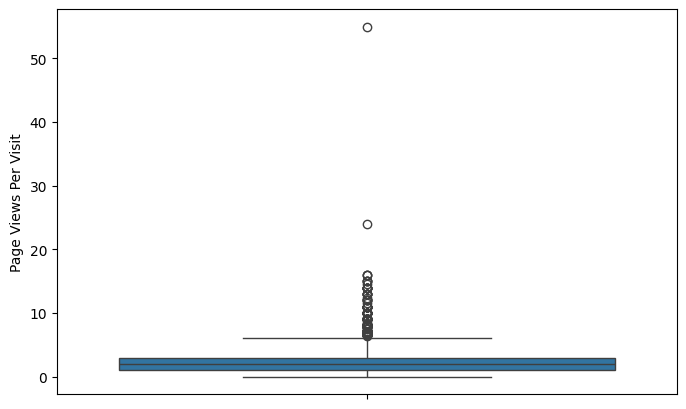

In [50]:
plt.figure(figsize = (8, 5))
sns.boxplot(y = 'Page Views Per Visit', data = data)
plt.show()

#### We can see there are few outliers, but we have two values which are outside the range (> 20) and it is safe to remove it so that it won't skew our data.

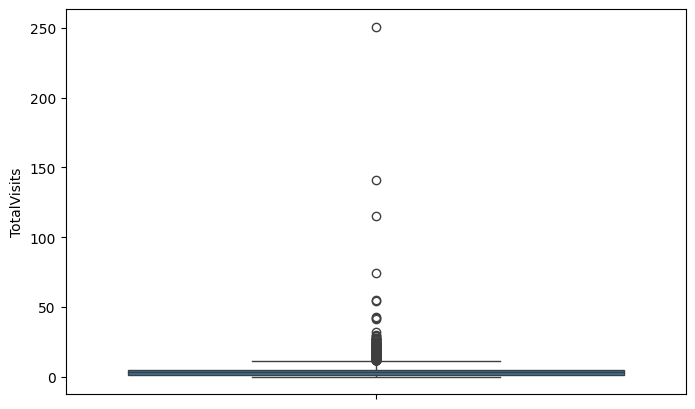

In [51]:
plt.figure(figsize = (8, 5))
sns.boxplot(y = 'TotalVisits', data = data)
plt.show()

#### We can see there are few outliers, but we have two values which are outside the range (> 100) and it is safe to remove it so that it won't skew our data.

#### We will create a function to remove outliers

In [52]:
def remove_outliers(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]


In [53]:
data = remove_outliers(data, 'Page Views Per Visit')

In [54]:
data = remove_outliers(data, 'TotalVisits')

#### Plotting again

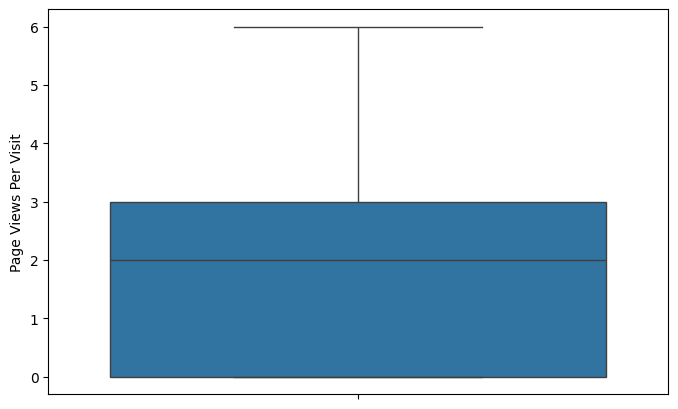

In [55]:
plt.figure(figsize = (8, 5))
sns.boxplot(y = 'Page Views Per Visit', data = data)
plt.show()

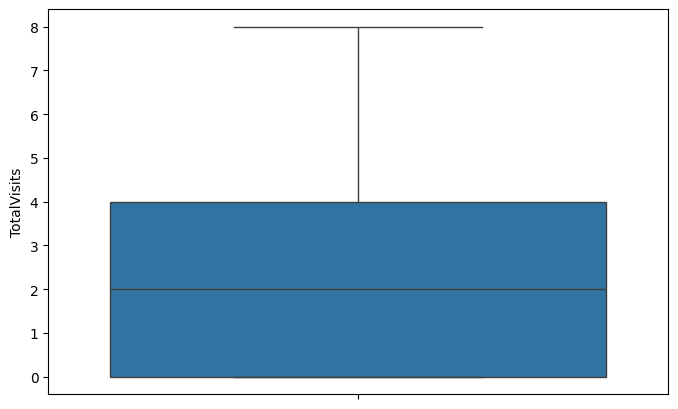

In [56]:
plt.figure(figsize = (8, 5))
sns.boxplot(y = 'TotalVisits', data = data)
plt.show()

In [57]:
for col in data.columns:
    print(data[col].value_counts())

Prospect ID
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
2a272436-5132-4136-86fa-dcc88c88f482    1
8cc8c611-a219-4f35-ad23-fdfd2656bd8a    1
0cc2df48-7cf4-4e39-9de9-19797f9b38cc    1
                                       ..
3abb7c77-1634-4083-9a9f-861068220611    1
25f4ac14-ff4b-4cd2-9c61-b44c85e19c8f    1
a8531c22-fcf1-48f8-a711-fb5abf98ad87    1
88867067-3750-4753-8d33-1c7d1db53b5e    1
9bc8ce93-6144-49e0-9f9d-080fc980f83c    1
Name: count, Length: 8298, dtype: int64
Lead Number
579533    1
660737    1
660728    1
660727    1
660719    1
         ..
660540    1
660547    1
660553    1
660558    1
660570    1
Name: count, Length: 8298, dtype: int64
Lead Origin
Landing Page Submission    4255
API                        3378
Lead Add Form               626
Lead Import                  38
Quick Add Form                1
Name: count, dtype: int64
Lead Source
Google               2679
Direct Traffic       2272
Olark Chat           1738
Organic Search

#### We have certain columns with 'Yes' or 'No' values which we can convert to 1 and 0 respectively
The columns are
- Do Not Email
- Do Not Call
- Search
- Digital Advertisement
- Through Recommendations
- A free copy of Mastering The Interview

#### We initially had additional columns with 'Yes' or 'No' values, such as 'Newspaper Article', 'X Education Forums', and 'Newspaper'. However, the 'Yes' values were removed when we eliminated the outliers.

In [58]:
yes_no_list =  ['Do Not Email','Do Not Call','Search','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

data[yes_no_list] = data[yes_no_list].apply(binary_map)

### Create dummies for the categorical variables
Filter out the categorical variables

In [59]:
categorical = categorical = list(set(data.columns) - set(data.select_dtypes(include=['int64', 'float64', 'datetime']).columns))
categorical

['Update me on Supply Chain Content',
 'Lead Source',
 'Receive More Updates About Our Courses',
 'What matters most to you in choosing a course',
 'Lead Origin',
 'Prospect ID',
 'Newspaper Article',
 'Lead Quality',
 'I agree to pay the amount through cheque',
 'Last Notable Activity',
 'Magazine',
 'Get updates on DM Content',
 'Last Activity',
 'Newspaper',
 'X Education Forums']

#### Remove Prospect ID as it is a unique ID of the dataset

In [60]:
categorical.remove('Prospect ID')
categorical

['Update me on Supply Chain Content',
 'Lead Source',
 'Receive More Updates About Our Courses',
 'What matters most to you in choosing a course',
 'Lead Origin',
 'Newspaper Article',
 'Lead Quality',
 'I agree to pay the amount through cheque',
 'Last Notable Activity',
 'Magazine',
 'Get updates on DM Content',
 'Last Activity',
 'Newspaper',
 'X Education Forums']

In [61]:
# Creating a dummy variable for  the categorical variables and dropping the first one.
categorical_dummies = pd.get_dummies(data[categorical], drop_first = True, dtype=int)
categorical_dummies

Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                              0                     0                   0   
1                              0                     0                   0   
2                              1                     0                   0   
3                              1                     0                   0   
4                              0                     0                   1   
...                          ...                   ...                 ...   
9235                           1                     0                   0   
9236                           1                     0                   0   
9237                           1                     0                   0   
9238                           0                     0                   1   
9239                           1                     0                   0   

      Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
0                         0                   0                       1   
1                         0                   0                       0   
2                         0                   0                       0   
3                         0                   0                       0   
4                         0                   0                       0   
...                     ...                 ...                     ...   
9235                      0                   0                       0   
9236                      0                   0                       0   
9237                      0                   0                       0   
9238                      0                   0                       0   
9239                      0                   0                       0   

      Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                              0                              0   
1                              1                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   
...                          ...                            ...   
9235                           0                              0   
9236                           0                              0   
9237                           0                              0   
9238                           0                              0   
9239                           0                              0   

      Lead Source_Press_Release  Lead Source_Reference  ...  \
0                             0                      0  ...   
1                             0                      0  ...   
2                             0                      0  ...   
3                             0                      0  ...   
4                             0                      0  ...   
...                         ...                    ...  ...   
9235                          0                      0  ...   
9236                          0                      0  ...   
9237                          0                      0  ...   
9238                          0                      0  ...   
9239                          0                      0  ...   

      Last Activity_Form Submitted on Website  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
...                                       ...   
9235                                        0   
9236                                        0   
9237                                        0   
9238                                        0   
9239                                        0   

      Last Activi

In [62]:
categorical_dummies.columns

Index(['Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'What matters most to you in choosing a course_Other',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Quality_Low in Relevance', 'Lead Quality_Might be',
       'Lead Quality_Not Sure', 'Lead Quality_Unknown', 'Lead Quality_Worst',
       

#### There are certain columns that got dropped as there is only one value in that columns like 'Newspaper'

### Concat dummies with data and drop the categorical variables

In [63]:
data.shape

(8298, 26)

In [64]:
categorical_dummies.shape

(8298, 61)

In [65]:
len(categorical)

14

In [66]:
data = pd.concat([data, categorical_dummies], axis=1)

In [67]:
data.shape

(8298, 87)

### Drop the categorical variables as we have concatenated the dummy variables.

In [68]:
data = data.drop(categorical, axis=1)

In [69]:
data.shape

(8298, 73)

In [70]:
### Checking the conversion Rate
conv = (sum(data['Converted'])/len(data['Converted'].index))*100
conv

37.46685948421306

#### We have 37.47% conversion rate.

## Train-Test split

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X = data.drop(['Converted','Prospect ID', 'Lead Number'], axis=1)
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Search  Digital Advertisement  \
0                   0.0       0                      0   
1                   2.5       0                      0   
2                   2.0       0                      0   
3                   1.0       0                      0   
4                   1.0       0                      0   

   Through Recommendations  A free copy of Mastering The Interview  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Lead Source_Direct Traffic  ...  Last Activity_Form Submitted on Website  \
0                           0  ...                                        0   
1                           0  ...                                        0   
2                           1  ...                                        0   
3                           1  ...                                        0   
4                           0  ...                                        0   

   Last Activity_Had a Phone Conversation  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Last Activity_Olark Chat Conversation  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Last Activity_Page Visited on Website  \
0                                      1   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Last Activity_Resubscribed to emails  Last Activity_SMS Sent  \
0                                     0                       0   
1                                     0                       0   
2                                     0                       0   
3                                     0                       0   
4                                     0                       0   

   Last Activity_Unreachable  Last Activity_Unsubscribed  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          1                           0   
4                          0                           0   

   Last Activity_View in browser link Clicked  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Last Activity_Visited Booth in Tradeshow  
0                                         0  
1                                         0  
2                                         0  
3                                         0  
4                                         0  

[5 rows x 70 columns]

In [73]:
y = data['Converted']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling using StandardScaler
It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients obtained by fitting the regression model might be very large or very small when compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
X_train.describe()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
count   5808.000000  5808.000000  5808.000000                  5808.000000   
mean       0.081095     0.000172     2.575241                   462.022727   
std        0.273005     0.013122     2.100092                   541.159013   
min        0.000000     0.000000     0.000000                     0.000000   
25%        0.000000     0.000000     0.000000                     0.000000   
50%        0.000000     0.000000     2.000000                   228.500000   
75%        0.000000     0.000000     4.000000                   866.000000   
max        1.000000     1.000000     8.000000                  2272.000000   

       Page Views Per Visit       Search  Digital Advertisement  \
count           5808.000000  5808.000000                 5808.0   
mean               2.029039     0.000517                    0.0   
std                1.650475     0.022723                    0.0   
min                0.000000     0.000000                    0.0   
25%                0.000000     0.000000                    0.0   
50%                2.000000     0.000000                    0.0   
75%                3.000000     0.000000                    0.0   
max                6.000000     1.000000                    0.0   

       Through Recommendations  A free copy of Mastering The Interview  \
count              5808.000000                             5808.000000   
mean                  0.000344                                0.289256   
std                   0.018555                                0.453456   
min                   0.000000                                0.000000   
25%                   0.000000                                0.000000   
50%                   0.000000                                0.000000   
75%                   0.000000                                1.000000   
max                   1.000000                                1.000000   

       Lead Source_Direct Traffic  ...  \
count                 5808.000000  ...   
mean                     0.270833  ...   
std                      0.444428  ...   
min                      0.000000  ...   
25%                      0.000000  ...   
50%                      0.000000  ...   
75%                      1.000000  ...   
max                      1.000000  ...   

       Last Activity_Form Submitted on Website  \
count                              5808.000000   
mean                                  0.011880   
std                                   0.108356   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.000000   
max                                   1.000000   

       Last Activity_Had a Phone Conversation  \
count                             5808.000000   
mean                                 0.003099   
std                                  0.055589   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                  0.000000   
max                                  1.000000   

       Last Activity_Olark Chat Conversation  \
count                            5808.000000   
mean                                0.114325   
std                                 0.318233   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 1.000000   

       Last Activity_Page Visited on Website  \
count                            5808.000000   
mean                                0.055613   
std                                 0.229192   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.00

In [77]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
8076             0            0    -1.226357                    -0.853839   
8036             0            0    -1.226357                    -0.853839   
3744             0            0    -1.226357                    -0.853839   
5180             0            0    -1.226357                    -0.853839   
8866             0            0    -1.226357                    -0.853839   

      Page Views Per Visit  Search  Digital Advertisement  \
8076             -1.229472       0                      0   
8036             -1.229472       0                      0   
3744             -1.229472       0                      0   
5180             -1.229472       0                      0   
8866             -1.229472       0                      0   

      Through Recommendations  A free copy of Mastering The Interview  \
8076                        0                                       0   
8036                        0                                       0   
3744                        0                                       0   
5180                        0                                       0   
8866                        0                                       0   

      Lead Source_Direct Traffic  ...  \
8076                           0  ...   
8036                           0  ...   
3744                           0  ...   
5180                           0  ...   
8866                           0  ...   

      Last Activity_Form Submitted on Website  \
8076                                        0   
8036                                        0   
3744                                        0   
5180                                        0   
8866                                        0   

      Last Activity_Had a Phone Conversation  \
8076                                       0   
8036                                       0   
3744                                       0   
5180                                       0   
8866                                       0   

      Last Activity_Olark Chat Conversation  \
8076                                      0   
8036                                      1   
3744                                      1   
5180                                      0   
8866                                      1   

      Last Activity_Page Visited on Website  \
8076                                      1   
8036                                      0   
3744                                      0   
5180                                      0   
8866                                      0   

      Last Activity_Resubscribed to emails  Last Activity_SMS Sent  \
8076                                     0                       0   
8036                                     0                       0   
3744                                     0                       0   
5180                                     0                       1   
8866                                     0                       0   

      Last Activity_Unreachable  Last Activity_Unsubscribed  \
8076                          0                           0   
8036                          0                           0   
3744                          0                           0   
5180                          0                           0   
8866                          0                           0   

      Last Activity_View in browser link Clicked  \
8076                                           0   
8036                                           0   
3744                                           0   
5180                                           0   
8866                                           0   

      Last Activity_Visited Booth in Tradeshow  
8076                                         0  
8036                                         0  
3744                                         0  
5180                           

### We will transform the test data using the scaler. We won't do fit as we must use the same parameters learned from the training data to ensure that the test data is treated consistently.

In [78]:
X_test[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']])

X_test.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
4366             0            0     1.154696                    -0.705995   
1551             0            0     1.630906                    -0.251376   
4882             0            0    -1.226357                    -0.853839   
8563             0            0    -0.273936                     1.823978   
7569             0            0    -0.273936                    -0.776221   

      Page Views Per Visit  Search  Digital Advertisement  \
4366              1.800219       0                      0   
1551              2.406157       0                      0   
4882             -1.229472       0                      0   
8563             -0.017596       0                      0   
7569             -0.017596       0                      0   

      Through Recommendations  A free copy of Mastering The Interview  \
4366                        0                                       0   
1551                        0                                       1   
4882                        0                                       0   
8563                        0                                       0   
7569                        0                                       0   

      Lead Source_Direct Traffic  ...  \
4366                           0  ...   
1551                           1  ...   
4882                           0  ...   
8563                           0  ...   
7569                           0  ...   

      Last Activity_Form Submitted on Website  \
4366                                        0   
1551                                        0   
4882                                        0   
8563                                        0   
7569                                        0   

      Last Activity_Had a Phone Conversation  \
4366                                       0   
1551                                       0   
4882                                       0   
8563                                       0   
7569                                       0   

      Last Activity_Olark Chat Conversation  \
4366                                      0   
1551                                      0   
4882                                      1   
8563                                      0   
7569                                      1   

      Last Activity_Page Visited on Website  \
4366                                      0   
1551                                      0   
4882                                      0   
8563                                      0   
7569                                      0   

      Last Activity_Resubscribed to emails  Last Activity_SMS Sent  \
4366                                     0                       0   
1551                                     0                       0   
4882                                     0                       0   
8563                                     0                       0   
7569                                     0                       0   

      Last Activity_Unreachable  Last Activity_Unsubscribed  \
4366                          0                           0   
1551                          0                           0   
4882                          0                           0   
8563                          0                           0   
7569                          0                           0   

      Last Activity_View in browser link Clicked  \
4366                                           0   
1551                                           0   
4882                                           0   
8563                                           0   
7569                                           0   

      Last Activity_Visited Booth in Tradeshow  
4366                                         0  
1551                                         0  
4882                                         0  
8563                           

## Checking for correlations

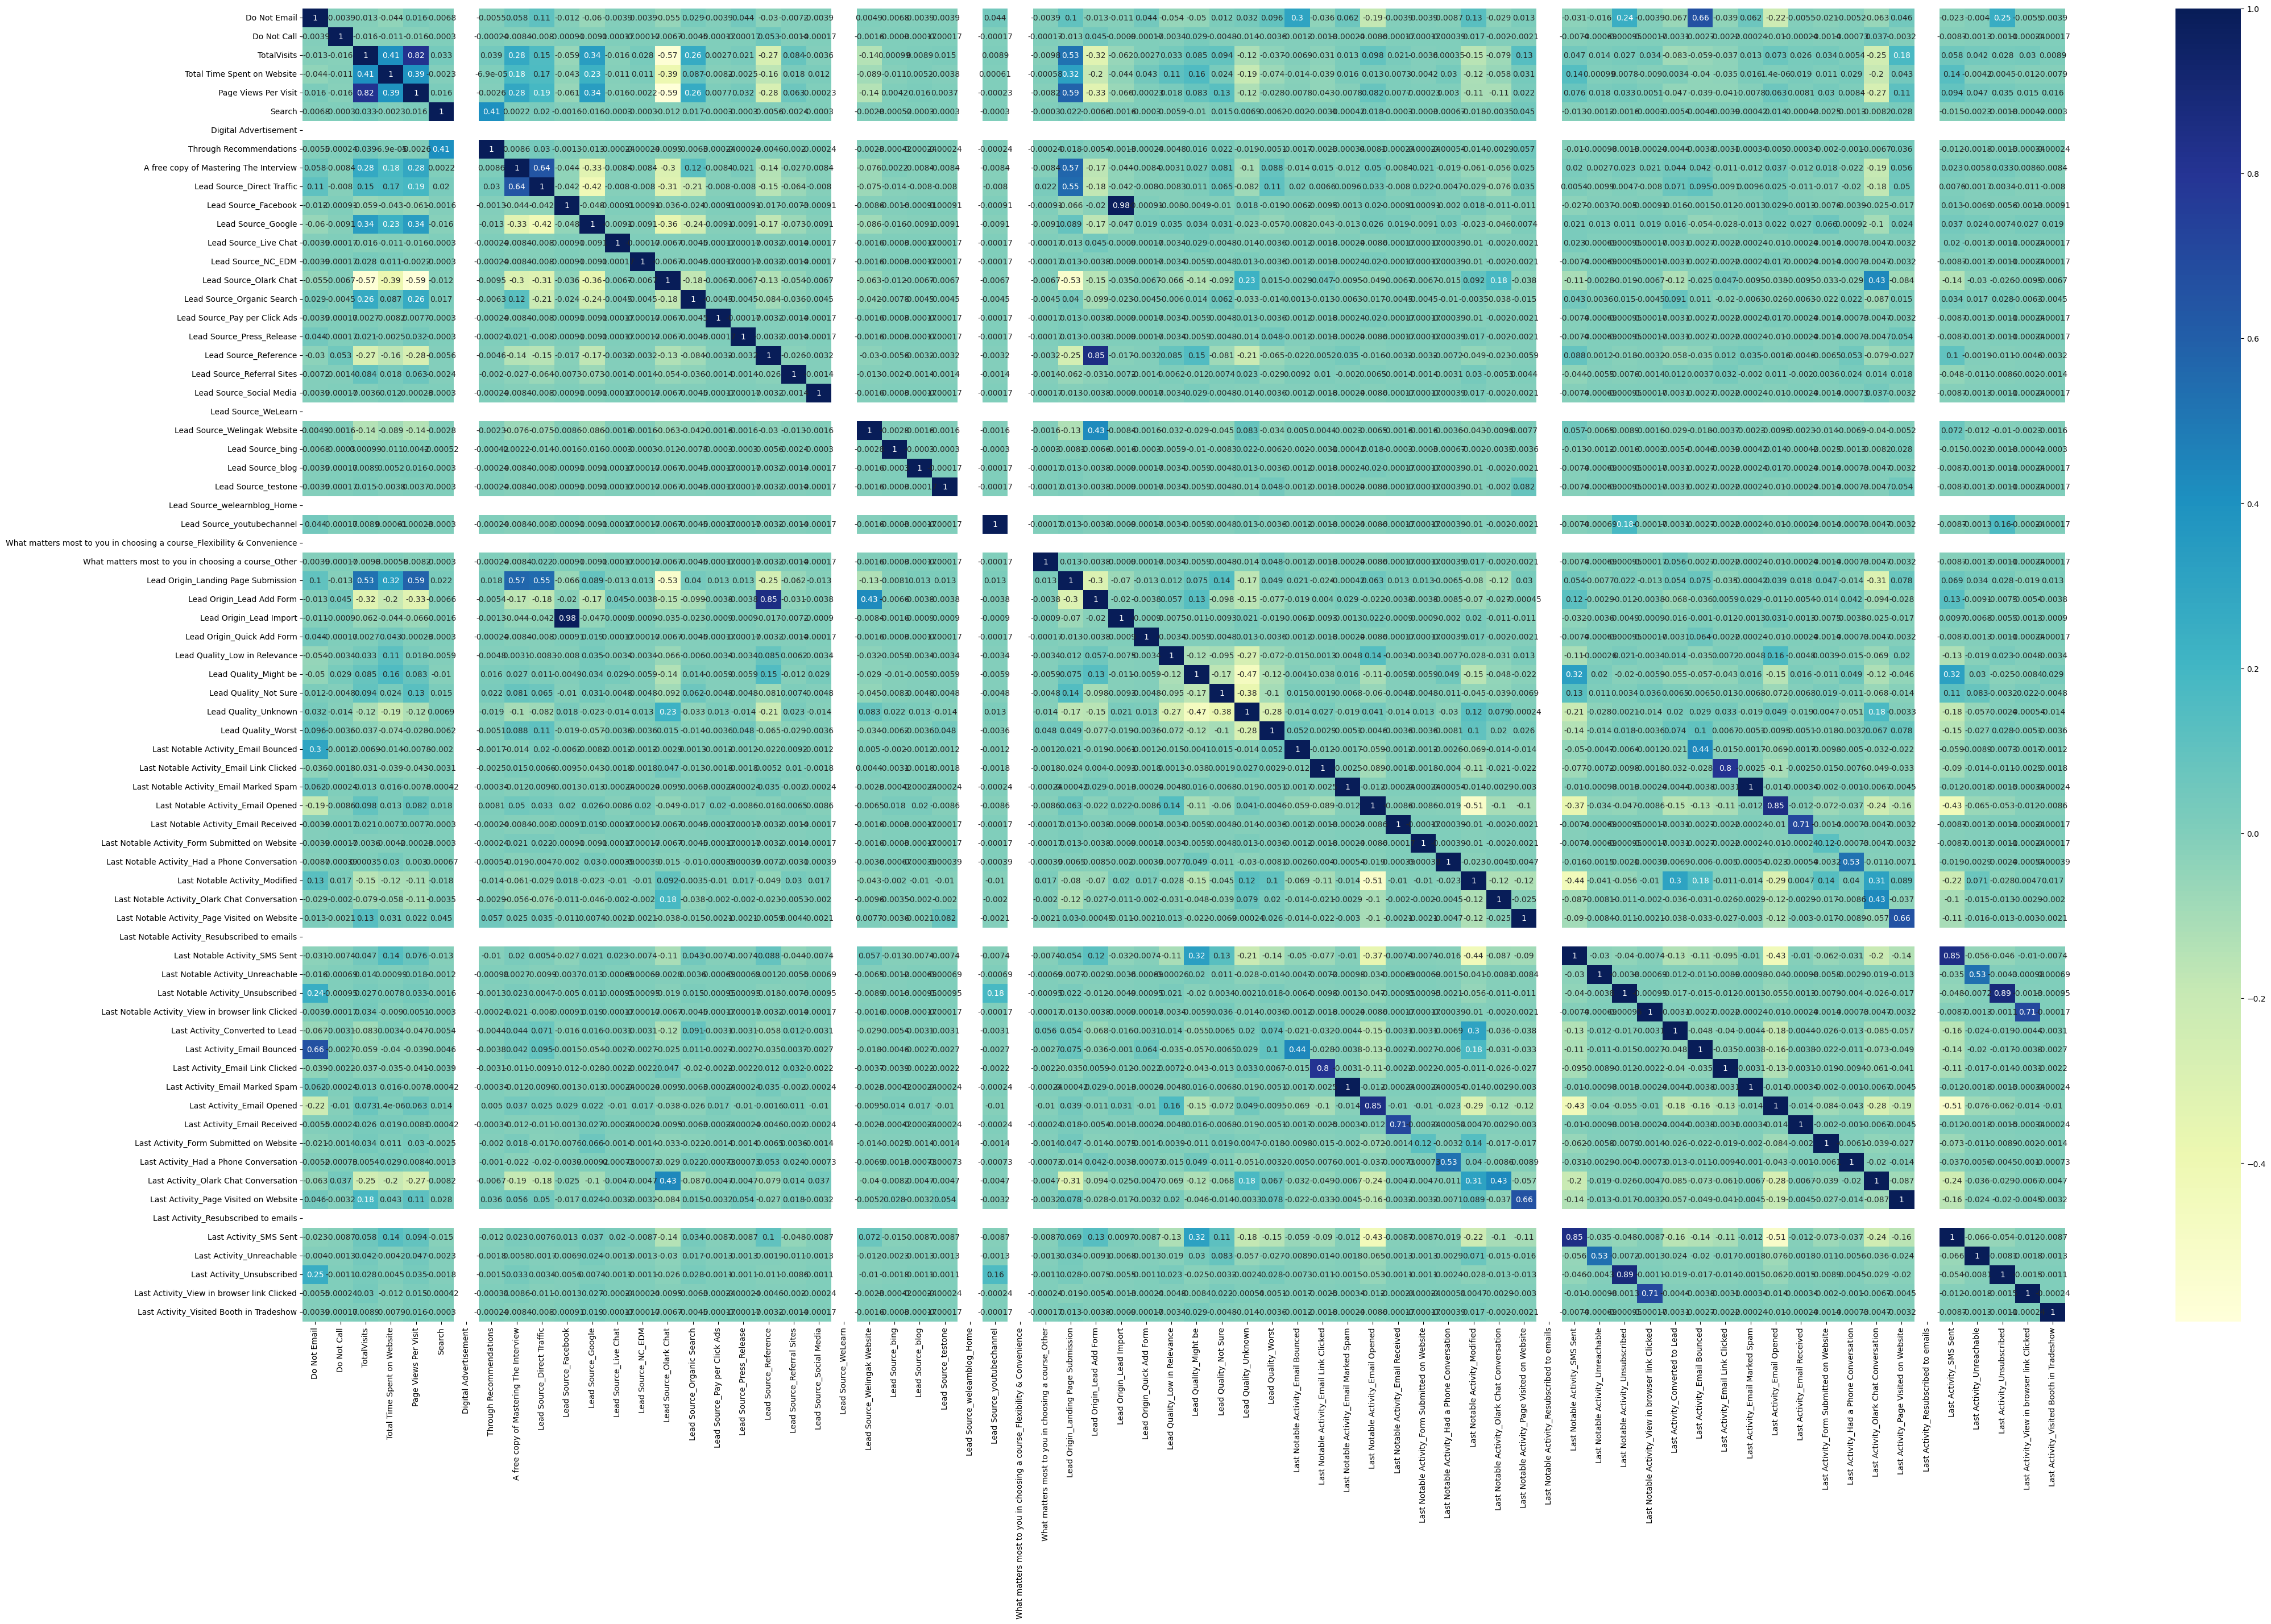

In [79]:
plt.figure(figsize = (50,30))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [80]:
correlation_matrix = X_train.corr()
high_correlation = correlation_matrix.unstack().sort_values(ascending=False)

# Filter out self-correlations (correlation of a variable with itself)
high_correlation = high_correlation[high_correlation != 1]

# Select only pairs with high correlation
high_correlation_upper = high_correlation[high_correlation > 0.8]
high_correlation_lower = high_correlation[high_correlation < -0.8]
print(high_correlation_upper)

Lead Origin_Lead Import                   Lead Source_Facebook                        0.981896
Lead Source_Facebook                      Lead Origin_Lead Import                     0.981896
Last Notable Activity_Unsubscribed        Last Activity_Unsubscribed                  0.887908
Last Activity_Unsubscribed                Last Notable Activity_Unsubscribed          0.887908
Last Notable Activity_Email Opened        Last Activity_Email Opened                  0.853494
Last Activity_Email Opened                Last Notable Activity_Email Opened          0.853494
Lead Origin_Lead Add Form                 Lead Source_Reference                       0.851688
Lead Source_Reference                     Lead Origin_Lead Add Form                   0.851688
Last Notable Activity_SMS Sent            Last Activity_SMS Sent                      0.847323
Last Activity_SMS Sent                    Last Notable Activity_SMS Sent              0.847323
TotalVisits                               Page Vie

In [81]:
print(high_correlation_lower)

Series([], dtype: float64)


In [82]:
corr_columns = ['Lead Origin_Lead Import','Lead Source_Facebook','Last Activity_Unsubscribed',
                'Last Notable Activity_Unsubscribed','Last Notable Activity_Email Opened',
                'Last Activity_Email Opened','Lead Source_Reference','Lead Origin_Lead Add Form',
                'Last Notable Activity_SMS Sent','Last Activity_SMS Sent','TotalVisits',
                'Page Views Per Visit','Last Activity_Email Link Clicked','Last Notable Activity_Email Link Clicked']

In [83]:
X_test = X_test.drop(corr_columns, axis=1)
X_train = X_train.drop(corr_columns, axis=1)

In [84]:
X_train.shape

(5808, 56)

In [85]:
X_test.shape

(2490, 56)

## Feature Selection using RFE

In [86]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [87]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [88]:
rfe.support_

array([False, False,  True, False, False, False, False,  True,  True,
       False, False,  True,  True, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False])

In [89]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', np.False_, np.int64(11)),
 ('Do Not Call', np.False_, np.int64(17)),
 ('Total Time Spent on Website', np.True_, np.int64(1)),
 ('Search', np.False_, np.int64(14)),
 ('Digital Advertisement', np.False_, np.int64(42)),
 ('Through Recommendations', np.False_, np.int64(25)),
 ('A free copy of Mastering The Interview', np.False_, np.int64(36)),
 ('Lead Source_Direct Traffic', np.True_, np.int64(1)),
 ('Lead Source_Google', np.True_, np.int64(1)),
 ('Lead Source_Live Chat', np.False_, np.int64(31)),
 ('Lead Source_NC_EDM', np.False_, np.int64(22)),
 ('Lead Source_Olark Chat', np.True_, np.int64(1)),
 ('Lead Source_Organic Search', np.True_, np.int64(1)),
 ('Lead Source_Pay per Click Ads', np.False_, np.int64(18)),
 ('Lead Source_Press_Release', np.False_, np.int64(34)),
 ('Lead Source_Referral Sites', np.True_, np.int64(1)),
 ('Lead Source_Social Media', np.False_, np.int64(29)),
 ('Lead Source_WeLearn', np.False_, np.int64(39)),
 ('Lead Source_Welingak Website', np.True_, 

In [90]:
col = X_train.columns[rfe.support_]

In [91]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'What matters most to you in choosing a course_Other',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Quick Add Form',
       'Lead Quality_Low in Relevance', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable

## Model Building

In [92]:
import statsmodels.api as sm

In [93]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5808
Model:                            GLM   Df Residuals:                     5792
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2137.5
Date:                Tue, 20 Aug 2024   Deviance:                       4274.9
Time:                        18:48:56   Pearson chi2:                 5.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4467
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             4.2873      0.212     20.245      0.000       3.872       4.702
Total Time Spent on Website                       1.0180      0.045     22.788      0.000       0.930       1.106
Lead Source_Direct Traffic                       -2.7090      0.197    -13.734      0.000      -3.096      -2.322
Lead Source_Google                               -2.2698      0.193    -11.791      0.000      -2.647      -1.893
Lead Source_Olark Chat                           -1.0988      0.197     -5.565      0.000      -1.486      -0.712
Lead Source_Organic Search                       -2.4223      0.214    -11.338      0.000      -2.841      -2.004
Lead Source_Referral Sites                       -2.5560      0.430     -5.942      0.000      -3.399      -1.713
Lead Source_Welingak Website                      4.4608      1.028      4.338      0.000       2.446       6.476
Lead Quality_Might be                            -0.9915      0.153     -6.472      0.000      -1.292      -0.691
Lead Quality_Not Sure                            -3.0825      0.166    -18.571      0.000      -3.408      -2.757
Lead Quality_Unknown                             -3.2106      0.141    -22.733      0.000      -3.487      -2.934
Lead Quality_Worst                               -6.0810      0.485    -12.541      0.000      -7.031      -5.131
Last Notable Activity_Modified                   -1.0004      0.094    -10.694      0.000      -1.184      -0.817
Last Notable Activity_Olark Chat Conversation    -0.9744      0.409     -2.385      0.017      -1.775      -0.174
Last Activity_Email Bounced                      -2.1636      0.400     -5.415      0.000      -2.947      -1.381
Last Activity_Olark Chat Conversation            -1.0585      0.217     -4.870      0.000      -1.485      -0.633
=================================================================================================================
"""

In [94]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8076    0.806317
8036    0.049727
3744    0.002957
5180    0.317955
8866    0.049727
3941    0.290841
17      0.668331
4461    0.712627
3371    0.056606
250     0.076242
dtype: float64

In [95]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.806317  , 0.04972664, 0.00295704, 0.31795506, 0.04972664,
       0.29084118, 0.66833082, 0.71262729, 0.05660614, 0.07624216])

### Create a dataframe with conversion probability

In [96]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prosepct ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Prosepct ID
0          0        0.806317         8076
1          0        0.049727         8036
2          0        0.002957         3744
3          1        0.317955         5180
4          0        0.049727         8866

### Create a new column predicted

#### As a start, we will take 0.3 as a random cut-off now just to verify the accuracy

In [97]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob  Prosepct ID  predicted
0          0        0.806317         8076          1
1          0        0.049727         8036          0
2          0        0.002957         3744          0
3          1        0.317955         5180          1
4          0        0.049727         8866          0

### Confusion matrix

In [98]:
from sklearn import metrics

In [99]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2936  666]
 [ 364 1842]]


#### Accuracy of the model

In [100]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8226584022038568


### Check VIF
We will check the VIF and see the multicollinearity and try to improve the accuracy for the existing model

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9                            Lead Quality_Unknown  5.39
2                              Lead Source_Google  3.51
1                      Lead Source_Direct Traffic  3.19
3                          Lead Source_Olark Chat  2.90
11                 Last Notable Activity_Modified  2.05
14          Last Activity_Olark Chat Conversation  2.00
7                           Lead Quality_Might be  1.98
8                           Lead Quality_Not Sure  1.98
4                      Lead Source_Organic Search  1.83
10                             Lead Quality_Worst  1.67
12  Last Notable Activity_Olark Chat Conversation  1.38
0                     Total Time Spent on Website  1.37
6                    Lead Source_Welingak Website  1.12
13                    Last Activity_Email Bounced  1.12
5                      Lead Source_Referral Sites  1.09

### We will drop the column 'Lead Quality_Unknown' as its VIF is greater than 5

In [103]:
col = col.drop('Lead Quality_Unknown')
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Lead Quality_Might be',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation'],
      dtype='object')

### Let us rerun the model with new columns again

In [104]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5808
Model:                            GLM   Df Residuals:                     5793
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2504.0
Date:                Tue, 20 Aug 2024   Deviance:                       5007.9
Time:                        18:48:56   Pearson chi2:                 5.63e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3723
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             2.6151      0.166     15.758      0.000       2.290       2.940
Total Time Spent on Website                       1.0628      0.041     25.776      0.000       0.982       1.144
Lead Source_Direct Traffic                       -3.5659      0.181    -19.714      0.000      -3.920      -3.211
Lead Source_Google                               -3.1762      0.176    -18.076      0.000      -3.521      -2.832
Lead Source_Olark Chat                           -2.2344      0.178    -12.546      0.000      -2.584      -1.885
Lead Source_Organic Search                       -3.3349      0.196    -16.986      0.000      -3.720      -2.950
Lead Source_Referral Sites                       -3.4714      0.386     -8.991      0.000      -4.228      -2.715
Lead Source_Welingak Website                      2.9979      1.023      2.930      0.003       0.993       5.003
Lead Quality_Might be                             1.5081      0.096     15.719      0.000       1.320       1.696
Lead Quality_Not Sure                            -0.5484      0.112     -4.884      0.000      -0.768      -0.328
Lead Quality_Worst                               -3.5711      0.470     -7.592      0.000      -4.493      -2.649
Last Notable Activity_Modified                   -0.8700      0.083    -10.478      0.000      -1.033      -0.707
Last Notable Activity_Olark Chat Conversation    -0.8347      0.374     -2.234      0.025      -1.567      -0.102
Last Activity_Email Bounced                      -2.0822      0.355     -5.863      0.000      -2.778      -1.386
Last Activity_Olark Chat Conversation            -1.2866      0.201     -6.400      0.000      -1.681      -0.893
=================================================================================================================
"""

### Check VIF after dropping the variable

In [105]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10                 Last Notable Activity_Modified  2.04
13          Last Activity_Olark Chat Conversation  2.00
3                          Lead Source_Olark Chat  1.62
2                              Lead Source_Google  1.49
1                      Lead Source_Direct Traffic  1.47
11  Last Notable Activity_Olark Chat Conversation  1.38
0                     Total Time Spent on Website  1.28
7                           Lead Quality_Might be  1.24
8                           Lead Quality_Not Sure  1.22
4                      Lead Source_Organic Search  1.18
9                              Lead Quality_Worst  1.15
12                    Last Activity_Email Bounced  1.12
5                      Lead Source_Referral Sites  1.02
6                    Lead Source_Welingak Website  1.01

### The VIF(< 5) and p-values(< 0.05) are good now

### Calculating predicetd again

In [106]:
# Exisiting y train predictions
y_train_pred_final.head()

Converted  Converted_Prob  Prosepct ID  predicted
0          0        0.806317         8076          1
1          0        0.049727         8036          0
2          0        0.002957         3744          0
3          1        0.317955         5180          1
4          0        0.049727         8866          0

In [107]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [108]:
y_train_pred[:10]

array([0.91259753, 0.06396121, 0.00191807, 0.25442655, 0.06396121,
       0.37126827, 0.68684774, 0.83654571, 0.0596249 , 0.14863587])

In [109]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [110]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prosepct ID  predicted
0          0        0.912598         8076          1
1          0        0.063961         8036          0
2          0        0.001918         3744          0
3          1        0.254427         5180          0
4          0        0.063961         8866          0

### Accuracy of the model

In [111]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.78116391184573


### Confusion Matrix

In [112]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2639  963]
 [ 308 1898]]


### Metrics beyond simply accuracy

In [113]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

### Sensitivity

In [114]:
print(TP / float(TP+FN))

0.8603807796917498


### Specificity

In [115]:
print(TN / float(TN+FP))

0.7326485285952249


### Calculate false postive rate - predicting converted when customer does not have converted

In [116]:
print(FP/ float(TN+FP))

0.2673514714047751


### Positive predictive value

In [117]:
 print (TP / float(TP+FP))

0.6634044040545264


### Negative predictive value

In [118]:
print (TN / float(TN+ FN))

0.8954869358669834


## Plotting ROC curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [119]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [120]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

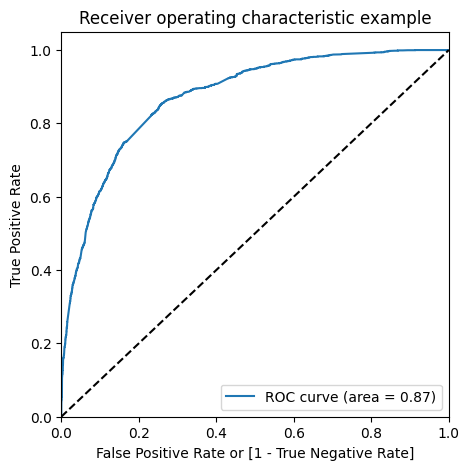

In [121]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### To find the optimal cutoff point

In [122]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prosepct ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.912598         8076          1    1    1    1    1    1   
1          0        0.063961         8036          0    1    0    0    0    0   
2          0        0.001918         3744          0    1    0    0    0    0   
3          1        0.254427         5180          0    1    1    1    0    0   
4          0        0.063961         8866          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    1    1    1    1    1  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    0    0    0    0    0

In [123]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.379821     1.000000     0.000000
0.1   0.1  0.602961     0.976881     0.373959
0.2   0.2  0.715909     0.907978     0.598279
0.3   0.3  0.781164     0.860381     0.732649
0.4   0.4  0.803030     0.742520     0.840089
0.5   0.5  0.797693     0.678150     0.870905
0.6   0.6  0.789084     0.587942     0.912271
0.7   0.7  0.762913     0.473255     0.940311
0.8   0.8  0.738292     0.360834     0.969461
0.9   0.9  0.688705     0.195830     0.990561


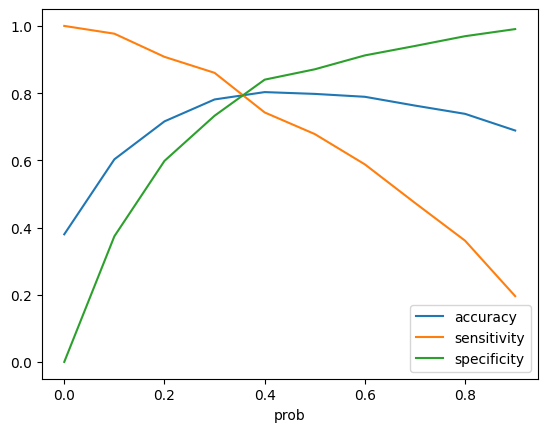

In [124]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

### Our cut-off of 0.3 seems to good as it has good accuracy, sensitivity and specificity

In [125]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  Prosepct ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.912598         8076          1    1    1    1    1    1   
1          0        0.063961         8036          0    1    0    0    0    0   
2          0        0.001918         3744          0    1    0    0    0    0   
3          1        0.254427         5180          0    1    1    1    0    0   
4          0        0.063961         8866          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    1    1    1    1    1                1  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    0    0    0    0    0                0  
4    0    0    0    0    0                0

## We can give a score from 0 to 100 to each prospect which can be used by the company to target potential leads.
The score can be identified by multiplying the probability by 100. The higher the score, the higher are the chances that the lead gets converted.

In [126]:
y_train_pred_final['Lead Score'] = y_train_pred_final.Converted_Prob.map( lambda x: x * 100 )
y_train_pred_final.head()

Converted  Converted_Prob  Prosepct ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.912598         8076          1    1    1    1    1    1   
1          0        0.063961         8036          0    1    0    0    0    0   
2          0        0.001918         3744          0    1    0    0    0    0   
3          1        0.254427         5180          0    1    1    1    0    0   
4          0        0.063961         8866          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  Lead Score  
0    1    1    1    1    1                1   91.259753  
1    0    0    0    0    0                0    6.396121  
2    0    0    0    0    0                0    0.191807  
3    0    0    0    0    0                0   25.442655  
4    0    0    0    0    0                0    6.396121

In [127]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.78116391184573

In [128]:
confusion_train = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_train

array([[2639,  963],
       [ 308, 1898]])

In [129]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

#### Let's see the sensitivity of our logistic regression model

In [130]:
print(TP / float(TP+FN))

0.8603807796917498


#### Specificty

In [131]:
print(TN / float(TN+FP))

0.7326485285952249


#### Calculate false postive rate - predicting converted when customer does not have converted

In [132]:
print(FP/ float(TN+FP))

0.2673514714047751


#### Positive predictive value 

In [133]:
print (TP / float(TP+FP))

0.6634044040545264


#### Negative predictive value

In [134]:
print (TN / float(TN+ FN))

0.8954869358669834


#### Precision

In [135]:
print(TP / (TP + FP))

0.6634044040545264


#### Recall

In [136]:
print(TP / (TP + FN))

0.8603807796917498


### Precision and Recall tradeoff

In [137]:
from sklearn.metrics import precision_recall_curve

In [138]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

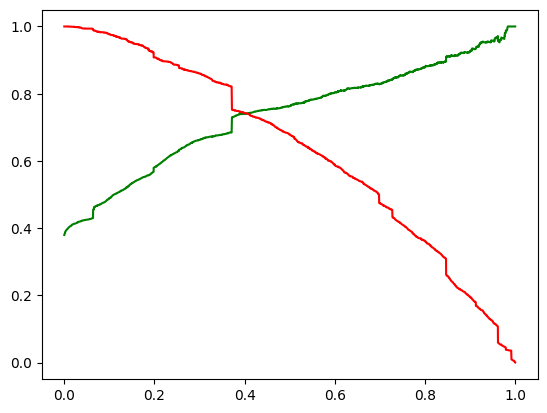

In [139]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## We have selected 0.3 as the cut-off. According to the above precision recall curve a good cut-off may be between 0.3 to 0.4. For now we are going ahead with 0.3

## Making predictions on the test set

In [140]:
X_test_sm = sm.add_constant(X_test[col])

In [141]:
y_test_pred = res.predict(X_test_sm)

In [142]:
y_test_pred[:10]

4366    0.212257
1551    0.110279
4882    0.063961
8563    0.586293
7569    0.028124
607     0.978868
4997    0.593054
6843    0.703904
1228    0.063961
3880    0.063961
dtype: float64

#### Converting y_test_pred to dataframse as it is an array

In [143]:
y_pred_1 = pd.DataFrame(y_test_pred)

#### Converting y_test to dataframe and making Prospect ID as index

In [144]:
y_test_df = pd.DataFrame(y_test)
y_test_df['Prospect ID'] = y_test_df.index

In [145]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [146]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [147]:
y_pred_final.head()

Converted  Prospect ID         0
0          0         4366  0.212257
1          0         1551  0.110279
2          1         4882  0.063961
3          0         8563  0.586293
4          0         7569  0.028124

#### Rename the column to 'Converted_Prob'

In [148]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [149]:
y_pred_final.head()

Converted  Prospect ID  Converted_Prob
0          0         4366        0.212257
1          0         1551        0.110279
2          1         4882        0.063961
3          0         8563        0.586293
4          0         7569        0.028124

#### Rearrange the columns in order

In [150]:
y_pred_final = y_pred_final[['Prospect ID', 'Converted', 'Converted_Prob']]
y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         4366          0        0.212257
1         1551          0        0.110279
2         4882          1        0.063961
3         8563          0        0.586293
4         7569          0        0.028124

In [151]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final['Lead Score'] = y_pred_final.Converted_Prob.map( lambda x: x * 100 )
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted  Lead Score
0         4366          0        0.212257                0   21.225715
1         1551          0        0.110279                0   11.027900
2         4882          1        0.063961                0    6.396121
3         8563          0        0.586293                1   58.629319
4         7569          0        0.028124                0    2.812392

## The Lead Score can be used by the company to target potential leads.

### Accuracy

In [152]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7678714859437751

In [153]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1129,  458],
       [ 120,  783]])

In [154]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

### Sensitivity

In [155]:
print(TP / float(TP+FN))

0.867109634551495


### Specificity

In [156]:
print(TN / float(TN+FP))

0.7114051669817265


### We can compare accuracy, sensitivity and specificity of the trainining and test data.

<div style="float:left;text-align: left;">
<h3>Train set values</h3>
    
| Accuracy  | Sensitivity | Specificity |
|-----------|-------------|-------------|
| 0.781164  | 0.860381    | 0.732649    |
</div>
<div style="float:left;text-align: left;clear: left;">
<h3>Test set values</h3>
    
| Accuracy  | Sensitivity | Specificity |
|-----------|-------------|-------------|
| 0.767871  | 0.867109    | 0.711405    |

</div>

## The values of the train and test data are similar, which is a positive indicator, so we can proceed with this model.

### We took 0.3 as the cutoff because sensitivity is high in 0.3 compared to 0.4 which will help us to identify more conversions which will reduce the False Negatives. (TP / (TP+FN))

### The Lead Score is assigned for the test and train set for the analysis. It can be added to the main data set also.

------------------------------------------------------------------------------------------

# We can use another approach where we won't drop columns much, but replace them with 'Unknown'.
- The below approach handles the data without dropping many columns
- This will retain more columns by replacing null values
- We will user LabelEncoder instead of dummies
- MinMax Scaler is used instead of StandardScaler

In [157]:
df=pd.read_csv('Leads.csv')

In [158]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [160]:
df.shape

(9240, 37)

In [161]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

## Preprocessing of data

In [162]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

### Percentage of null values

In [163]:
(df.isnull().sum()/df.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

### Lead Quality unique values

In [164]:
df['Lead Quality'].value_counts()

Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

#### Replace the null values in lead quality to Unknown

In [165]:
df['Lead Quality']=df['Lead Quality'].fillna('Unknown')

In [166]:
df['Lead Quality'].isnull().sum()

np.int64(0)

### List of columns having null values greater than 40%

In [167]:
missing_val_col=[]
for i in df.columns:
    if (df[i].isnull().mean())*100 > 40:
        missing_val_col.append(i)
missing_val_col

['Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

#### We will keep the first column and remove the remaining columns

In [168]:
col=missing_val_col.pop(0)
print(col)

Asymmetrique Activity Index


In [169]:
for i in missing_val_col:
    df=df.drop(i,axis=1)

In [170]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

#### The null values of the first column is replaced with 'Unknown'

In [171]:
df[col].value_counts()

Asymmetrique Activity Index
02.Medium    3839
01.High       821
03.Low        362
Name: count, dtype: int64

In [172]:
df[col]=df[col].fillna('Unknown')

In [173]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

### We will go through the remaining columns to see the different values

In [174]:
df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [175]:
df['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

### We are able to see 'Select' as a value which has of no use and it is a default value. We can replave it with null.

In [176]:
df.replace('Select',np.nan,inplace=True)

### Taking the null value percentage of the remaining columns

In [177]:
(df.isnull().sum()/df.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

### Prepare a list of columns with null values more than 25% and replace the null values with unknown

In [178]:
cols=(df.isnull().sum()/df.shape[0])*100
cols=cols[cols>25]

print(cols)

Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Profile                                     74.188312
City                                             39.707792
dtype: float64


In [179]:
cols=cols.index.tolist()
print(cols)

['Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Profile', 'City']


In [180]:
for i in cols:
    df[i]=df[i].fillna('Unknown')

### We have replace the columns with more than 25% with 'Unknown'

#### Calculate the null values

In [181]:
df.isnull().sum()

Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Country                                            0
Specialization                                     0
How did you hear about X Education                 0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                             

In [182]:
df.shape

(9240, 34)

### Drop all the null value records

In [183]:
df=df.dropna()
df.shape

(9074, 34)

In [184]:
df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

### Find the categorical columns

In [185]:
categorical_cols=df.loc[:,df.dtypes=='object']
categorical_cols.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [186]:
categorical_cols=list(categorical_cols)
categorical_cols

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

## We will process the data using LabelEncoder
Unlike dummies, it won't create new columns, it will assign an integer to each categorical value of the column

In [187]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
for i in categorical_cols:
    df[i]=label_encoder.fit_transform(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 34 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   int64  
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   int64  
 3   Lead Source                                    9074 non-null   int64  
 4   Do Not Email                                   9074 non-null   int64  
 5   Do Not Call                                    9074 non-null   int64  
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 non-n

In [188]:
df.shape

(9074, 34)

In [189]:
df.head()

Prospect ID  Lead Number  Lead Origin  Lead Source  Do Not Email  \
0         4332       660737            0            6             0   
1         1527       660728            0            7             0   
2         5034       660727            1            1             0   
3          462       660719            1            1             0   
4         1842       660681            1            3             0   

   Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0            0          0          0.0                            0   
1            0          0          5.0                          674   
2            0          1          2.0                         1532   
3            0          0          1.0                          305   
4            0          1          2.0                         1428   

   Page Views Per Visit  ...  Tags  Lead Quality  \
0                   0.0  ...     8             1   
1                   2.5  ...    14             4   
2                   2.0  ...    20             2   
3                   1.0  ...    14             3   
4                   1.0  ...    20             2   

   Update me on Supply Chain Content  Get updates on DM Content  Lead Profile  \
0                                  0                          0             5   
1                                  0                          0             5   
2                                  0                          0             3   
3                                  0                          0             5   
4                                  0                          0             5   

   City  Asymmetrique Activity Index  \
0     6                            1   
1     6                            1   
2     0                            1   
3     0                            1   
4     0                            1   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   A free copy of Mastering The Interview  Last Notable Activity  
0                                       0                      8  
1                                       0                      4  
2                                       1                      4  
3                                       0                      8  
4                                       0                      8  

[5 rows x 34 columns]

### As we can see above all the categorical values got updated to numerical values

## Train-Test Split

In [190]:
df=df.drop(['Prospect ID','Lead Number'],axis=1)

In [191]:
X=df.drop(['Converted'],axis=1)
Y=df['Converted']

In [192]:
X.head()

Lead Origin  Lead Source  Do Not Email  Do Not Call  TotalVisits  \
0            0            6             0            0          0.0   
1            0            7             0            0          5.0   
2            1            1             0            0          2.0   
3            1            1             0            0          1.0   
4            1            3             0            0          2.0   

   Total Time Spent on Website  Page Views Per Visit  Last Activity  Country  \
0                            0                   0.0             10       36   
1                          674                   2.5              5       12   
2                         1532                   2.0              5       12   
3                          305                   1.0             13       12   
4                         1428                   1.0              1       12   

   Specialization  ...  Tags  Lead Quality  Update me on Supply Chain Content  \
0              18  ...     8             1                                  0   
1              18  ...    14             4                                  0   
2               1  ...    20             2                                  0   
3              11  ...    14             3                                  0   
4              18  ...    20             2                                  0   

   Get updates on DM Content  Lead Profile  City  Asymmetrique Activity Index  \
0                          0             5     6                            1   
1                          0             5     6                            1   
2                          0             3     0                            1   
3                          0             5     0                            1   
4                          0             5     0                            1   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   A free copy of Mastering The Interview  Last Notable Activity  
0                                       0                      8  
1                                       0                      4  
2                                       1                      4  
3                                       0                      8  
4                                       0                      8  

[5 rows x 31 columns]

In [193]:
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [194]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=0)

In [195]:
x_train.shape

(6351, 31)

In [196]:
y_train.shape

(6351,)

In [197]:
x_test.shape

(2723, 31)

In [198]:
y_test.shape

(2723,)

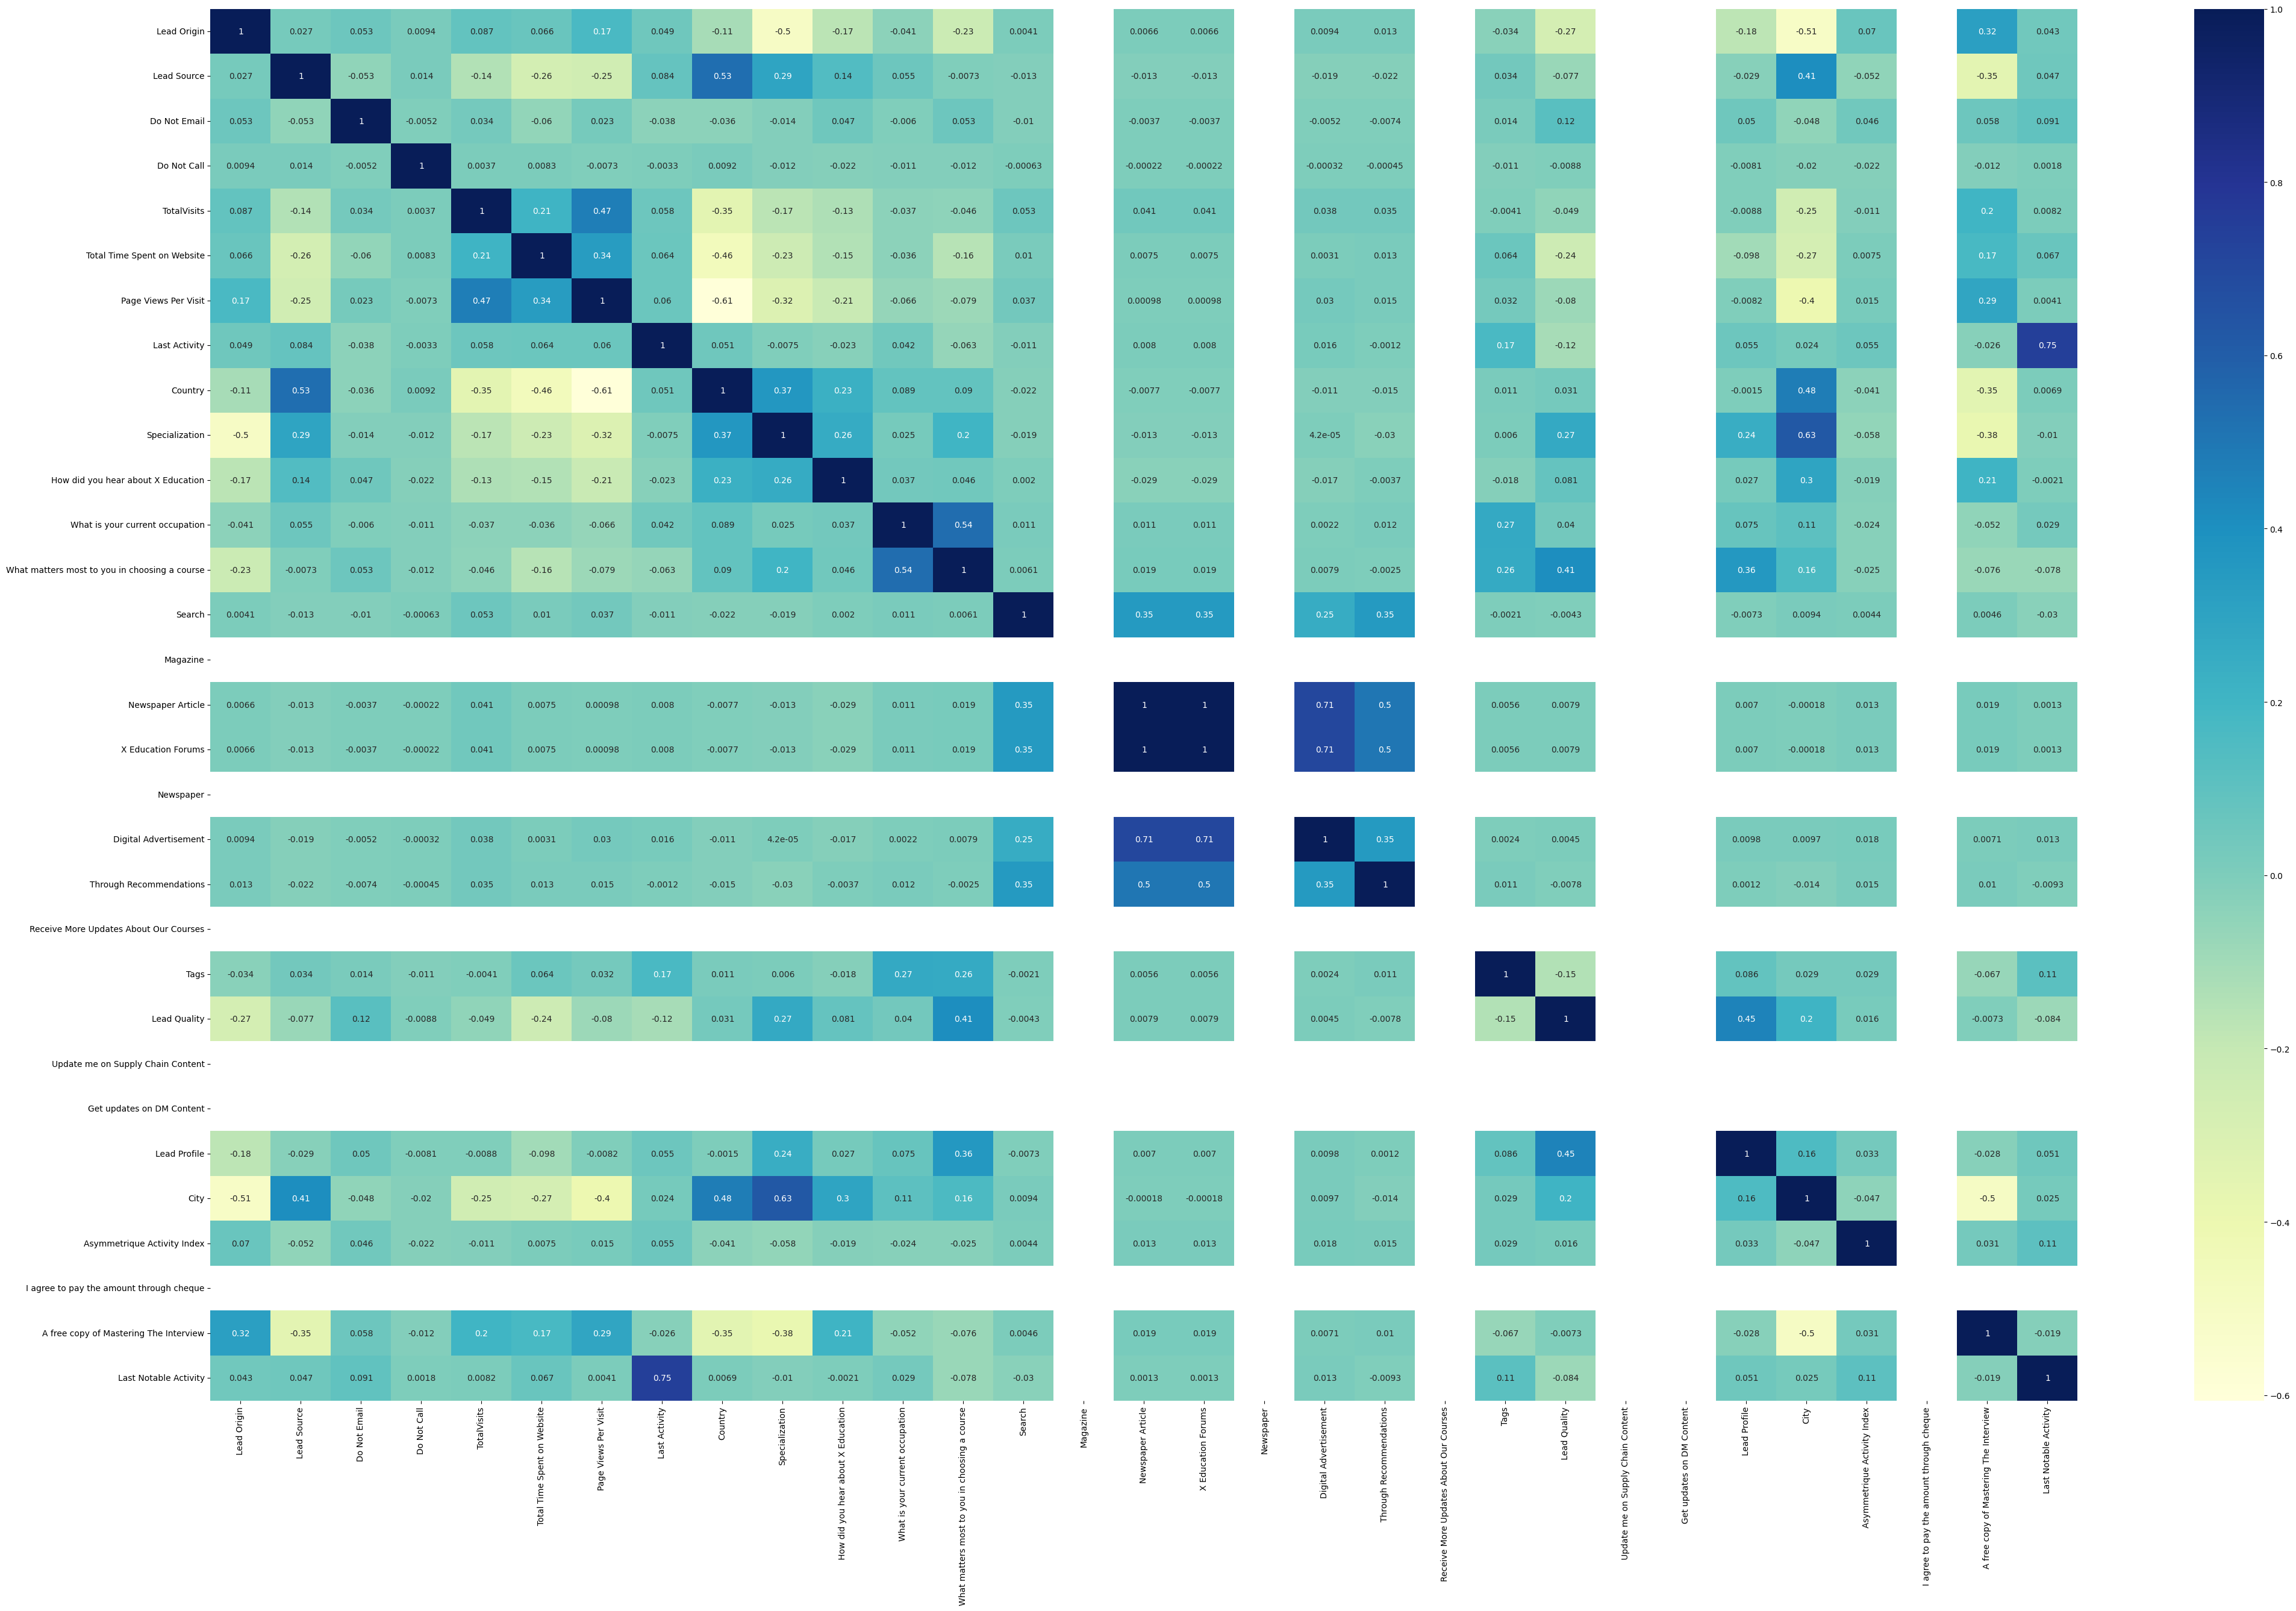

In [199]:
plt.figure(figsize = (50,30))
sns.heatmap(x_train.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [200]:
correlation_matrix = x_train.corr()
high_correlation = correlation_matrix.unstack().sort_values(ascending=False)

# Filter out self-correlations (correlation of a variable with itself)
high_correlation = high_correlation[high_correlation != 1]

# Select only pairs with high correlation. This time going ahead with 0.7
high_correlation_upper = high_correlation[high_correlation > 0.7]
high_correlation_lower = high_correlation[high_correlation < -0.7]
print(high_correlation_upper)

Last Notable Activity  Last Activity            0.746943
Last Activity          Last Notable Activity    0.746943
Digital Advertisement  X Education Forums       0.707051
Newspaper Article      Digital Advertisement    0.707051
Digital Advertisement  Newspaper Article        0.707051
X Education Forums     Digital Advertisement    0.707051
dtype: float64


In [201]:
print(high_correlation_lower)

Series([], dtype: float64)


In [202]:
correlation_columns = ['Last Notable Activity', 'Last Activity', 'Digital Advertisement', 'Newspaper Article', 'X Education Forums']

In [203]:
x_test = x_test.drop(correlation_columns, axis=1)
x_train = x_train.drop(correlation_columns, axis=1)

## Using MinMaxScaler to scale the data
It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients obtained by fitting the regression model might be very large or very small when compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

We will transform the test data using the scaler. We won't do fit as we must use the same parameters learned from the training data to ensure that the test data is treated consistently.

In [204]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_train_df = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)

x_test_scaled=scaler.transform(x_test)
x_test_df = pd.DataFrame(x_test_scaled, columns=x_test.columns, index=x_test.index)

In [205]:
x_train_df.head()

Lead Origin  Lead Source  Do Not Email  Do Not Call  TotalVisits  \
8174     0.666667         0.50           0.0          0.0     0.000000   
6986     0.000000         0.30           0.0          0.0     0.000000   
8112     0.666667         0.50           0.0          0.0     0.000000   
8530     0.333333         0.05           0.0          0.0     0.007968   
6444     0.000000         0.30           0.0          0.0     0.023904   

      Total Time Spent on Website  Page Views Per Visit   Country  \
8174                     0.000000              0.000000  0.947368   
6986                     0.000000              0.000000  0.947368   
8112                     0.000000              0.000000  0.947368   
8530                     0.159331              0.083333  0.315789   
6444                     0.073944              0.050000  0.947368   

      Specialization  How did you hear about X Education  ...  \
8174        1.000000                            0.888889  ...   
6986        1.000000                            0.888889  ...   
8112        0.388889                            0.888889  ...   
8530        0.833333                            0.888889  ...   
6444        1.000000                            0.888889  ...   

      Receive More Updates About Our Courses      Tags  Lead Quality  \
8174                                     0.0  0.538462           0.8   
6986                                     0.0  0.692308           0.0   
8112                                     0.0  0.769231           0.4   
8530                                     0.0  0.692308           0.8   
6444                                     0.0  0.307692           0.2   

      Update me on Supply Chain Content  Get updates on DM Content  \
8174                                0.0                        0.0   
6986                                0.0                        0.0   
8112                                0.0                        0.0   
8530                                0.0                        0.0   
6444                                0.0                        0.0   

      Lead Profile  City  Asymmetrique Activity Index  \
8174           1.0   1.0                     0.333333   
6986           1.0   0.0                     0.000000   
8112           0.6   1.0                     0.333333   
8530           1.0   0.0                     0.333333   
6444           1.0   1.0                     1.000000   

      I agree to pay the amount through cheque  \
8174                                       0.0   
6986                                       0.0   
8112                                       0.0   
8530                                       0.0   
6444                                       0.0   

      A free copy of Mastering The Interview  
8174                                     0.0  
6986                                     0.0  
8112                                     0.0  
8530                                     1.0  
6444                                     0.0  

[5 rows x 26 columns]

In [206]:
x_train.head()

Lead Origin  Lead Source  Do Not Email  Do Not Call  TotalVisits  \
8174            2           10             0            0          0.0   
6986            0            6             0            0          0.0   
8112            2           10             0            0          0.0   
8530            1            1             0            0          2.0   
6444            0            6             0            0          6.0   

      Total Time Spent on Website  Page Views Per Visit  Country  \
8174                            0                   0.0       36   
6986                            0                   0.0       36   
8112                            0                   0.0       36   
8530                          362                   2.0       12   
6444                          168                   1.2       36   

      Specialization  How did you hear about X Education  ...  \
8174              18                                   8  ...   
6986              18                                   8  ...   
8112               7                                   8  ...   
8530              15                                   8  ...   
6444              18                                   8  ...   

      Receive More Updates About Our Courses  Tags  Lead Quality  \
8174                                       0    14             4   
6986                                       0    18             0   
8112                                       0    20             2   
8530                                       0    18             4   
6444                                       0     8             1   

      Update me on Supply Chain Content  Get updates on DM Content  \
8174                                  0                          0   
6986                                  0                          0   
8112                                  0                          0   
8530                                  0                          0   
6444                                  0                          0   

      Lead Profile  City  Asymmetrique Activity Index  \
8174             5     6                            1   
6986             5     0                            0   
8112             3     6                            1   
8530             5     0                            1   
6444             5     6                            3   

      I agree to pay the amount through cheque  \
8174                                         0   
6986                                         0   
8112                                         0   
8530                                         0   
6444                                         0   

      A free copy of Mastering The Interview  
8174                                       0  
6986                                       0  
8112                                       0  
8530                                       1  
6444                                       0  

[5 rows x 26 columns]

In [207]:
x_test_df.head()

Lead Origin  Lead Source  Do Not Email  Do Not Call  TotalVisits  \
3374     0.333333         0.05           0.0          0.0     0.023904   
4262     0.000000         0.30           0.0          0.0     0.000000   
7855     0.000000         0.15           0.0          0.0     0.011952   
3017     0.333333         0.15           0.0          0.0     0.015936   
560      0.000000         0.30           0.0          0.0     0.019920   

      Total Time Spent on Website  Page Views Per Visit   Country  \
3374                     0.027729              0.125000  0.315789   
4262                     0.000000              0.000000  0.947368   
7855                     0.036532              0.125000  0.315789   
3017                     0.516285              0.166667  0.315789   
560                      0.610475              0.069583  0.315789   

      Specialization  How did you hear about X Education  ...  \
3374        0.444444                            0.888889  ...   
4262        1.000000                            0.888889  ...   
7855        1.000000                            0.888889  ...   
3017        0.888889                            0.222222  ...   
560         0.000000                            0.888889  ...   

      Receive More Updates About Our Courses      Tags  Lead Quality  \
3374                                     0.0  0.692308           0.8   
4262                                     0.0  0.692308           0.8   
7855                                     0.0  0.692308           0.8   
3017                                     0.0  0.692308           0.8   
560                                      0.0  0.769231           0.0   

      Update me on Supply Chain Content  Get updates on DM Content  \
3374                                0.0                        0.0   
4262                                0.0                        0.0   
7855                                0.0                        0.0   
3017                                0.0                        0.0   
560                                 0.0                        0.0   

      Lead Profile      City  Asymmetrique Activity Index  \
3374           1.0  0.333333                     1.000000   
4262           1.0  1.000000                     1.000000   
7855           1.0  1.000000                     0.000000   
3017           1.0  0.000000                     1.000000   
560            0.6  0.666667                     0.333333   

      I agree to pay the amount through cheque  \
3374                                       0.0   
4262                                       0.0   
7855                                       0.0   
3017                                       0.0   
560                                        0.0   

      A free copy of Mastering The Interview  
3374                                     1.0  
4262                                     0.0  
7855                                     0.0  
3017                                     0.0  
560                                      1.0  

[5 rows x 26 columns]

In [208]:
x_test.head()

Lead Origin  Lead Source  Do Not Email  Do Not Call  TotalVisits  \
3374            1            1             0            0          6.0   
4262            0            6             0            0          0.0   
7855            0            3             0            0          3.0   
3017            1            3             0            0          4.0   
560             0            6             0            0          5.0   

      Total Time Spent on Website  Page Views Per Visit  Country  \
3374                           63                  3.00       12   
4262                            0                  0.00       36   
7855                           83                  3.00       12   
3017                         1173                  4.00       12   
560                          1387                  1.67       12   

      Specialization  How did you hear about X Education  ...  \
3374               8                                   8  ...   
4262              18                                   8  ...   
7855              18                                   8  ...   
3017              16                                   2  ...   
560                0                                   8  ...   

      Receive More Updates About Our Courses  Tags  Lead Quality  \
3374                                       0    18             4   
4262                                       0    18             4   
7855                                       0    18             4   
3017                                       0    18             4   
560                                        0    20             0   

      Update me on Supply Chain Content  Get updates on DM Content  \
3374                                  0                          0   
4262                                  0                          0   
7855                                  0                          0   
3017                                  0                          0   
560                                   0                          0   

      Lead Profile  City  Asymmetrique Activity Index  \
3374             5     2                            3   
4262             5     6                            3   
7855             5     6                            0   
3017             5     0                            3   
560              3     4                            1   

      I agree to pay the amount through cheque  \
3374                                         0   
4262                                         0   
7855                                         0   
3017                                         0   
560                                          0   

      A free copy of Mastering The Interview  
3374                                       1  
4262                                       0  
7855                                       0  
3017                                       0  
560                                        1  

[5 rows x 26 columns]

## Use RFE to select features

In [209]:
from sklearn.feature_selection import RFE

In [210]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
rfe=RFE(regressor,n_features_to_select=15)
rfe.fit(x_train_df,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [211]:
list(zip(x_train_df.columns, rfe.support_, rfe.ranking_))

[('Lead Origin', np.True_, np.int64(1)),
 ('Lead Source', np.True_, np.int64(1)),
 ('Do Not Email', np.True_, np.int64(1)),
 ('Do Not Call', np.True_, np.int64(1)),
 ('TotalVisits', np.True_, np.int64(1)),
 ('Total Time Spent on Website', np.True_, np.int64(1)),
 ('Page Views Per Visit', np.True_, np.int64(1)),
 ('Country', np.True_, np.int64(1)),
 ('Specialization', np.False_, np.int64(5)),
 ('How did you hear about X Education', np.False_, np.int64(3)),
 ('What is your current occupation', np.True_, np.int64(1)),
 ('What matters most to you in choosing a course', np.True_, np.int64(1)),
 ('Search', np.True_, np.int64(1)),
 ('Magazine', np.False_, np.int64(12)),
 ('Newspaper', np.False_, np.int64(11)),
 ('Through Recommendations', np.False_, np.int64(6)),
 ('Receive More Updates About Our Courses', np.False_, np.int64(10)),
 ('Tags', np.True_, np.int64(1)),
 ('Lead Quality', np.True_, np.int64(1)),
 ('Update me on Supply Chain Content', np.False_, np.int64(7)),
 ('Get updates on DM Co

In [212]:
col = x_train_df.columns[rfe.support_]

In [213]:
col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Tags',
       'Lead Quality', 'Lead Profile', 'City'],
      dtype='object')

## Model Building using Statsmodel

In [214]:
import statsmodels.api as sm

In [215]:
x_train_sm = sm.add_constant(x_train_df[col])
logm = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2392.9
Date:                Tue, 20 Aug 2024   Deviance:                       4785.8
Time:                        18:49:01   Pearson chi2:                 6.26e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4390
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.4357      0.428     -8.035      0.000      -4.274      -2.598
Lead Origin                                       1.4013      0.227      6.163      0.000       0.956       1.847
Lead Source                                       2.4257      0.298      8.149      0.000       1.842       3.009
Do Not Email                                     -1.2114      0.170     -7.117      0.000      -1.545      -0.878
Do Not Call                                      19.5522   1.25e+04      0.002      0.999   -2.44e+04    2.44e+04
TotalVisits                                       5.4739      2.215      2.471      0.013       1.132       9.815
Total Time Spent on Website                       4.7224      0.183     25.832      0.000       4.364       5.081
Page Views Per Visit                             -2.8181      0.600     -4.700      0.000      -3.993      -1.643
Country                                           1.6214      0.199      8.139      0.000       1.231       2.012
What is your current occupation                   3.5143      0.482      7.291      0.000       2.570       4.459
What matters most to you in choosing a course    -1.4262      0.124    -11.522      0.000      -1.669      -1.184
Search                                           -1.3565      1.144     -1.186      0.236      -3.598       0.885
Tags                                              2.1006      0.165     12.730      0.000       1.777       2.424
Lead Quality                                     -4.3993      0.198    -22.231      0.000      -4.787      -4.011
Lead Profile                                     -0.3758      0.226     -1.665      0.096      -0.818       0.067
City                                              0.3508      0.121      2.892      0.004       0.113       0.589
=================================================================================================================
"""

### Check VIF

In [216]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_df[col].columns
vif['VIF'] = [variance_inflation_factor(x_train_df[col].values, i) for i in range(x_train_df[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
8                 What is your current occupation  29.83
13                                   Lead Profile  23.94
12                                   Lead Quality  10.17
7                                         Country   8.80
11                                           Tags   7.66
14                                           City   4.76
1                                     Lead Source   4.75
6                            Page Views Per Visit   4.13
0                                     Lead Origin   3.47
5                     Total Time Spent on Website   2.39
9   What matters most to you in choosing a course   2.06
4                                     TotalVisits   1.89
2                                    Do Not Email   1.12
10                                         Search   1.01
3                                     Do Not Call   1.00

### 'Search' and 'Do Not Call' has high p-value. We can drop it.

In [217]:
col = col.drop(['Search', 'Do Not Call'])
col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Lead Profile', 'City'],
      dtype='object')

In [218]:
x_train_sm = sm.add_constant(x_train_df[col])
logm = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2394.3
Date:                Tue, 20 Aug 2024   Deviance:                       4788.5
Time:                        18:49:01   Pearson chi2:                 6.27e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4387
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.4246      0.427     -8.013      0.000      -4.262      -2.587
Lead Origin                                       1.3968      0.227      6.147      0.000       0.951       1.842
Lead Source                                       2.4382      0.298      8.195      0.000       1.855       3.021
Do Not Email                                     -1.2099      0.170     -7.110      0.000      -1.543      -0.876
TotalVisits                                       5.3570      2.193      2.442      0.015       1.058       9.656
Total Time Spent on Website                       4.7238      0.183     25.850      0.000       4.366       5.082
Page Views Per Visit                             -2.8344      0.599     -4.732      0.000      -4.008      -1.660
Country                                           1.6247      0.199      8.155      0.000       1.234       2.015
What is your current occupation                   3.5009      0.482      7.265      0.000       2.556       4.445
What matters most to you in choosing a course    -1.4248      0.124    -11.513      0.000      -1.667      -1.182
Tags                                              2.0993      0.165     12.726      0.000       1.776       2.423
Lead Quality                                     -4.4003      0.198    -22.229      0.000      -4.788      -4.012
Lead Profile                                     -0.3727      0.226     -1.652      0.098      -0.815       0.069
City                                              0.3420      0.121      2.823      0.005       0.105       0.579
=================================================================================================================
"""

### Check VIF

In [219]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_df[col].columns
vif['VIF'] = [variance_inflation_factor(x_train_df[col].values, i) for i in range(x_train_df[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
7                 What is your current occupation  29.83
11                                   Lead Profile  23.93
10                                   Lead Quality  10.17
6                                         Country   8.80
9                                            Tags   7.66
1                                     Lead Source   4.75
12                                           City   4.75
5                            Page Views Per Visit   4.12
0                                     Lead Origin   3.47
4                     Total Time Spent on Website   2.39
8   What matters most to you in choosing a course   2.06
3                                     TotalVisits   1.89
2                                    Do Not Email   1.12

### Dropping columns with VIF greater than 5

In [220]:
col = col.drop(['What is your current occupation', 'Lead Profile', 'Lead Quality', 'Lead Quality', 'Tags'])
col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'What matters most to you in choosing a course', 'City'],
      dtype='object')

In [221]:
x_train_sm = sm.add_constant(x_train_df[col])
logm = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3078.3
Date:                Tue, 20 Aug 2024   Deviance:                       6156.5
Time:                        18:49:01   Pearson chi2:                 6.46e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3038
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.7801      0.141    -19.708      0.000      -3.057      -2.504
Lead Origin                                       1.7138      0.187      9.148      0.000       1.347       2.081
Lead Source                                       2.9442      0.266     11.069      0.000       2.423       3.465
Do Not Email                                     -1.4141      0.151     -9.371      0.000      -1.710      -1.118
TotalVisits                                       4.3736      2.088      2.095      0.036       0.282       8.465
Total Time Spent on Website                       4.8239      0.161     29.886      0.000       4.508       5.140
Page Views Per Visit                             -1.9761      0.520     -3.801      0.000      -2.995      -0.957
Country                                           1.7312      0.175      9.882      0.000       1.388       2.075
What matters most to you in choosing a course    -1.6265      0.082    -19.723      0.000      -1.788      -1.465
City                                             -0.1057      0.099     -1.064      0.287      -0.300       0.089
=================================================================================================================
"""

### Check VIF

In [222]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_df[col].columns
vif['VIF'] = [variance_inflation_factor(x_train_df[col].values, i) for i in range(x_train_df[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6                                        Country  6.03
1                                    Lead Source  4.68
8                                           City  4.02
5                           Page Views Per Visit  3.10
0                                    Lead Origin  2.87
4                    Total Time Spent on Website  1.93
3                                    TotalVisits  1.87
7  What matters most to you in choosing a course  1.47
2                                   Do Not Email  1.10

### Dropping city column as its p value is greater than 0.05

In [223]:
col = col.drop(['City'])
col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'What matters most to you in choosing a course'],
      dtype='object')

In [224]:
x_train_sm = sm.add_constant(x_train_df[col])
logm = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3078.8
Date:                Tue, 20 Aug 2024   Deviance:                       6157.7
Time:                        18:49:02   Pearson chi2:                 6.44e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3037
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.8255      0.135    -21.004      0.000      -3.089      -2.562
Lead Origin                                       1.8161      0.161     11.248      0.000       1.500       2.133
Lead Source                                       2.8544      0.252     11.322      0.000       2.360       3.348
Do Not Email                                     -1.4166      0.151     -9.378      0.000      -1.713      -1.120
TotalVisits                                       4.4936      2.096      2.144      0.032       0.385       8.602
Total Time Spent on Website                       4.8209      0.161     29.904      0.000       4.505       5.137
Page Views Per Visit                             -1.9189      0.517     -3.710      0.000      -2.933      -0.905
Country                                           1.6961      0.172      9.869      0.000       1.359       2.033
What matters most to you in choosing a course    -1.6284      0.082    -19.756      0.000      -1.790      -1.467
=================================================================================================================
"""

In [225]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_df[col].columns
vif['VIF'] = [variance_inflation_factor(x_train_df[col].values, i) for i in range(x_train_df[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6                                        Country  4.46
1                                    Lead Source  4.18
5                           Page Views Per Visit  3.07
0                                    Lead Origin  2.27
4                    Total Time Spent on Website  1.89
3                                    TotalVisits  1.87
7  What matters most to you in choosing a course  1.44
2                                   Do Not Email  1.09

### Getting the predicted values

In [226]:
# Getting the predicted values on the train set
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

8174    0.805210
6986    0.410377
8112    0.805210
8530    0.074038
6444    0.501384
2489    0.764432
1737    0.480909
7461    0.103288
2370    0.117580
5290    0.600281
dtype: float64

In [227]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.80521009, 0.41037659, 0.80521009, 0.07403801, 0.50138396,
       0.76443161, 0.48090878, 0.10328752, 0.11758027, 0.60028078])

### Create a dataframe with conversion probability

In [228]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prosepct ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Prosepct ID
0          0        0.805210         8174
1          1        0.410377         6986
2          1        0.805210         8112
3          0        0.074038         8530
4          0        0.501384         6444

### To find the optimal cut-off

In [229]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prosepct ID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.805210         8174    1    1    1    1    1    1    1   
1          1        0.410377         6986    1    1    1    1    1    0    0   
2          1        0.805210         8112    1    1    1    1    1    1    1   
3          0        0.074038         8530    1    0    0    0    0    0    0   
4          0        0.501384         6444    1    1    1    1    1    1    0   

   0.7  0.8  0.9  
0    1    1    0  
1    0    0    0  
2    1    1    0  
3    0    0    0  
4    0    0    0

In [230]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.383562     1.000000     0.000000
0.1   0.1  0.526059     0.981938     0.242401
0.2   0.2  0.666509     0.912562     0.513410
0.3   0.3  0.736262     0.835796     0.674330
0.4   0.4  0.766651     0.769704     0.764751
0.5   0.5  0.779562     0.619869     0.878927
0.6   0.6  0.765076     0.538588     0.906003
0.7   0.7  0.739569     0.435550     0.928736
0.8   0.8  0.707763     0.303366     0.959387
0.9   0.9  0.630137     0.047619     0.992593


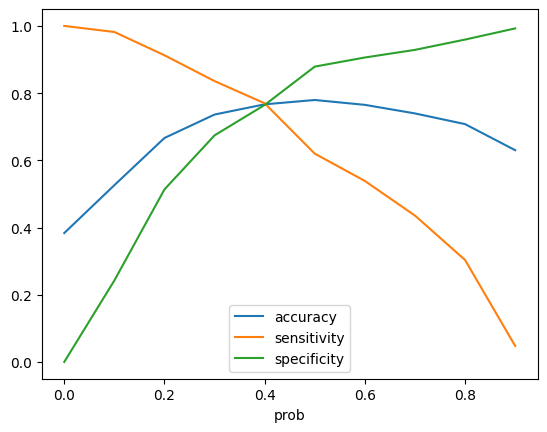

In [231]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

### Our cut-off of 0.4 seems to good as it has good accuracy, sensitivity and specificity

In [232]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  Prosepct ID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.805210         8174    1    1    1    1    1    1    1   
1          1        0.410377         6986    1    1    1    1    1    0    0   
2          1        0.805210         8112    1    1    1    1    1    1    1   
3          0        0.074038         8530    1    0    0    0    0    0    0   
4          0        0.501384         6444    1    1    1    1    1    1    0   

   0.7  0.8  0.9  final_predicted  
0    1    1    0                1  
1    0    0    0                1  
2    1    1    0                1  
3    0    0    0                0  
4    0    0    0                1

### Plotting ROC curve

In [233]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [234]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

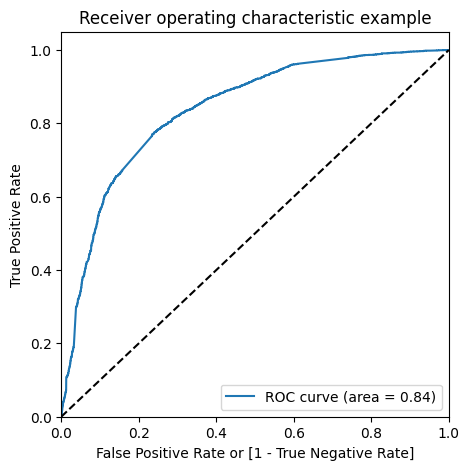

In [235]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# We can give a score from 0 to 100 to each prospect which can be used by the company to target potential leads.

In [236]:
y_train_pred_final['Lead Score'] = y_train_pred_final.Converted_Prob.map( lambda x: x * 100 )
y_train_pred_final.head()

Converted  Converted_Prob  Prosepct ID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.805210         8174    1    1    1    1    1    1    1   
1          1        0.410377         6986    1    1    1    1    1    0    0   
2          1        0.805210         8112    1    1    1    1    1    1    1   
3          0        0.074038         8530    1    0    0    0    0    0    0   
4          0        0.501384         6444    1    1    1    1    1    1    0   

   0.7  0.8  0.9  final_predicted  Lead Score  
0    1    1    0                1   80.521009  
1    0    0    0                1   41.037659  
2    1    1    0                1   80.521009  
3    0    0    0                0    7.403801  
4    0    0    0                1   50.138396

In [237]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7666509211147851

In [238]:
confusion_train = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_train

array([[2994,  921],
       [ 561, 1875]])

In [239]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

### Sensitivity

In [240]:
print(TP / float(TP+FN))

0.7697044334975369


### Specificity

In [241]:
print(TN / float(TN+FP))

0.7647509578544062


### Calculate false postive rate - predicting converted when customer does not have converted

In [242]:
print(FP/ float(TN+FP))

0.23524904214559386


### Positive Predictive value

In [243]:
print (TP / float(TP+FP))

0.6706008583690987


### Negative predictive value

In [244]:
print (TN / float(TN+ FN))

0.8421940928270042


### Precision

In [245]:
print(TP / (TP + FP))

0.6706008583690987


### Recall

In [246]:
print(TP / (TP + FN))

0.7697044334975369


### Precision and Recall tradeoff

In [247]:
from sklearn.metrics import precision_recall_curve

In [248]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

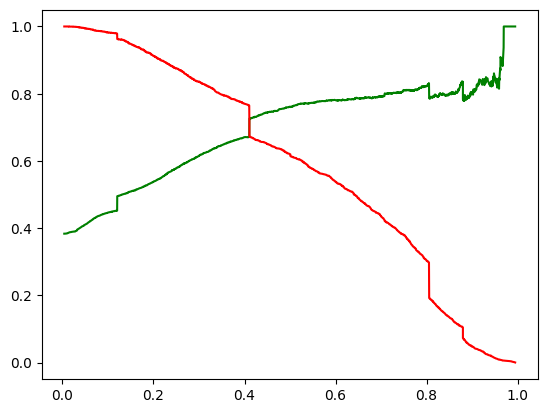

In [249]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [250]:
x_test_sm = sm.add_constant(x_test_df[col])

In [251]:
y_test_pred = res.predict(x_test_sm)

In [252]:
y_test_pred[:10]

3374    0.040348
4262    0.120170
7855    0.029306
3017    0.344322
560     0.812354
605     0.291939
5089    0.868464
6202    0.207127
4534    0.626068
6667    0.959110
dtype: float64

#### Converting y_test_pred to dataframse as it is an array

In [253]:
y_pred_1 = pd.DataFrame(y_test_pred)

#### Converting y_test to dataframe and making Prospect ID as index

In [254]:
y_test_df = pd.DataFrame(y_test)
y_test_df['Prospect ID'] = y_test_df.index

In [255]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [256]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [257]:
y_pred_final.head()

Converted  Prospect ID         0
0          0         3374  0.040348
1          0         4262  0.120170
2          0         7855  0.029306
3          1         3017  0.344322
4          1          560  0.812354

#### Rename the column to 'Converted_Prob'

In [258]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [259]:
y_pred_final.head()

Converted  Prospect ID  Converted_Prob
0          0         3374        0.040348
1          0         4262        0.120170
2          0         7855        0.029306
3          1         3017        0.344322
4          1          560        0.812354

#### Rearrange the columns in order

In [260]:
y_pred_final = y_pred_final[['Prospect ID', 'Converted', 'Converted_Prob']]
y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         3374          0        0.040348
1         4262          0        0.120170
2         7855          0        0.029306
3         3017          1        0.344322
4          560          1        0.812354

In [261]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final['Lead Score'] = y_pred_final.Converted_Prob.map( lambda x: x * 100 )
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted  Lead Score
0         3374          0        0.040348                0    4.034784
1         4262          0        0.120170                0   12.017049
2         7855          0        0.029306                0    2.930575
3         3017          1        0.344322                0   34.432207
4          560          1        0.812354                1   81.235437

### Accuracy

In [262]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7576202717590892

In [263]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1313,  411],
       [ 249,  750]])

In [264]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

### Sensitivity

In [265]:
print(TP / float(TP+FN))

0.7507507507507507


### Specificity

In [266]:
print(TN / float(TN+FP))

0.761600928074246


### We can compare accuracy, sensitivity and specificity of the trainining and test data.

<div style="float:left;text-align: left;">
<h3>Train set values</h3>          
    
| Accuracy  | Sensitivity | Specificity |
|-----------|-------------|-------------|
| 0.766651  | 0.769704    | 0.764751    |
</div>
<div style="float:left;text-align: left;clear: left;">
<h3>Test set values</h3>
    
| Accuracy  | Sensitivity | Specificity |
|-----------|-------------|-------------|
| 0.757620  | 0.750750    | 0.761600    |

</div>

## The values of the train and test data are similar, which is a positive indicator, so we can proceed with this model.

## When we compare our first approach with the second one, the first approach has more accuracy and sensitivity, but specificity is high in second model.

_____________________________________________________________________________________________________________________

# If we simply want to select the best features automatically based on the logistic regression model’s coefficients we can use the below prediction.

### The approach is easy to integrate into a machine learning pipeline where the focus is on prediction accuracy.
### This method focuses on prediction rather than understanding the statistical significance of the features.

In [267]:
predictions=rfe.predict(x_test_df)

In [268]:
from operator import itemgetter
features=x_train.columns.to_list()
for x,y in (sorted(zip(rfe.ranking_,features),key=itemgetter(0))):
    print(x,y)

1 Lead Origin
1 Lead Source
1 Do Not Email
1 Do Not Call
1 TotalVisits
1 Total Time Spent on Website
1 Page Views Per Visit
1 Country
1 What is your current occupation
1 What matters most to you in choosing a course
1 Search
1 Tags
1 Lead Quality
1 Lead Profile
1 City
2 A free copy of Mastering The Interview
3 How did you hear about X Education
4 Asymmetrique Activity Index
5 Specialization
6 Through Recommendations
7 Update me on Supply Chain Content
8 I agree to pay the amount through cheque
9 Get updates on DM Content
10 Receive More Updates About Our Courses
11 Newspaper
12 Magazine


In [269]:
confusion_matrix_only_prediction = confusion_matrix(y_test,predictions)

In [270]:
confusion_matrix_only_prediction

array([[1553,  171],
       [ 279,  720]])

In [271]:
TP = confusion_matrix_only_prediction[1,1] # true positive 
TN = confusion_matrix_only_prediction[0,0] # true negatives
FP = confusion_matrix_only_prediction[0,1] # false positives
FN = confusion_matrix_only_prediction[1,0] # false negatives

### Accuracy

In [272]:
metrics.accuracy_score(y_test, predictions)

0.8347410943811973

### Sensitivity

In [273]:
print(TP / float(TP+FN))

0.7207207207207207


### Specificity

In [274]:
print(TN / float(TN+FP))

0.9008120649651972


### The accuracy is high but sensitivity is low in the above case.